In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,glob
import seaborn as sns
from open_ephys.analysis import Session

from pynwb import NWBHDF5IO, NWBFile
from pynwb.file import Subject

from datetime import datetime
from dateutil.tz import tzlocal

from jlh_ephys.analysis import Analysis
from jlh_ephys.utils import choose_stim_parameter, OE
from jlh_ephys.psth_raster import psth_arr 
#from jlh_ephys import spatial_tools as st  ## compatability issues maybe need to install from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache in its own env 
from jlh_ephys.raw import find_artifact_start, align_data, raw_heatmap

from ccf_3D.tools import herbs_processing as hp
from ccf_3D.tools.metrics import distance

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

matplotlib.rcParams['ps.fonttype'] = 42

from scipy.ndimage import gaussian_filter1d

In [63]:
jlh31 = Analysis('jlh31', '2023-01-24') # all probes, many params and sites
jlh32 = Analysis('jlh32', '2023-02-18') # all probes, many params and sites
jlh33 = Analysis('jlh33', '2023-02-22') # probe B and C, many params and trains in diff recordings
jlh34 = Analysis('jlh34', '2023-05-15') # all 3 many params
jlh39 = Analysis('jlh39', '2023-08-16') # 3 probes for bi, no A for mono
jlh40 = Analysis('jlh40', '2023-08-21') # probeB and probe C only: monopolar -- with diff pulse width
jlh48 = Analysis('jlh48', '2024-11-05') # bb test, sorted only no bb portion (full bi and mono)
jlh49 = Analysis('jlh49v1', '2024-07-11') # bb test, just no bb portion (full bi only)
jlh53 = Analysis('jlh53concat', '2024-09-03') # regular, all 3 probes, probe A broke sometime. 

recordings = [jlh31, jlh32, jlh33, jlh34, jlh39, jlh40, jlh48, jlh49, jlh53]
slope_path = r"C:\Users\jordan\Documents\combined_figs\single_unit\unit_qual"
for r in recordings:
    r.get_brain_regs()
    r.get_electrode_coords()
    r.get_fs_rs(plot = False)
    slope_npy = glob.glob(os.path.join(slope_path, f'*{r.mouse}*'))[0]
    slope_outliers = np.load(slope_npy)
    r.units['slope_outlier'] = slope_outliers
    r.units['unit_id'] = r.units['probe'] + r.units['unit_id']
    

nn_contacts_labels = [6,11,3,14,1,16,2,15,5,12,4,13,7,10,8,9]

EP_path = r"C:\Users\jordan\Documents\combined_figs\evoked_potentials"

amp_alphas = {5: 0.3, 25: 0.5, 50: 0.7, 100: 1.0}
bipolar_color = '#82A69D'
cathodal_color = '#161943'
anodal_color = '#D99551'

for r in recordings:
    r.get_zetas()
    r.assign_zeta_sig(plot = False)


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded


NWB found. Trials and Units loaded


INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded


## Figure 7e Proportion of circuit responders

In [3]:
polarities = ['cathodal', 'anodal', 'bipolar']
amps = [-5, -25, -50, -100]
circuit_response = {} 

for pol in polarities:
    if pol == 'bipolar':
        pol_ = 'bipolar'
    else:
        pol_ = 'monopolar'
    
    if pol not in circuit_response.keys():
        circuit_response[pol] = {}
    for amp in amps:
        if pol == 'anodal':
            amp = np.abs(amp)
        if amp not in circuit_response[pol].keys():
            circuit_response[pol][amp] = []
        for r in recordings:
            runs = r.trials[(r.trials['amplitude'] == amp)&(r.trials['polarity'] == pol_)].run.unique()
            if len(runs) < 1:
                continue
            else:
                run = runs[0]
                good_units = r.units[(r.units.group == 'good') & (r.units.slope_outlier == False)]
                sig_units = len(good_units[good_units[f'r{run}'] == 'sig'])
                prop_sig = sig_units/len(good_units)
                circuit_response[pol][amp].append(prop_sig)

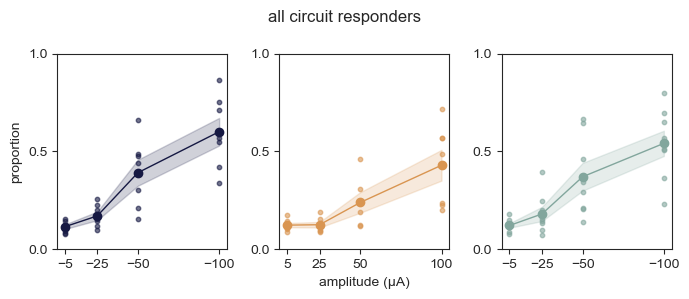

In [4]:
from scipy import stats

fig, axes = plt.subplots(1, 3, figsize=(7,3))

polarities = ['cathodal', 'anodal', 'bipolar']
colors = {'cathodal': cathodal_color, 'anodal': anodal_color, 'bipolar': bipolar_color}
for i, pol in enumerate(polarities):
    ax = axes[i]

    means = []
    sems  = []
    if pol == 'anodal':
        amps = [5, 25, 50, 100]
    else:
        amps = [-5, -25, -50, -100]
    for amp in amps:        
        vals = circuit_response[pol][amp]
        means.append(np.mean(vals))
        sems.append(stats.sem(vals))
        # Scatter individual points
        ax.scatter([amp]*len(vals), vals, color=colors[pol], alpha=0.6, s=10)

    means = np.array(means)
    sems = np.array(sems)
    
    # mean and sem error clouds
    ax.plot(amps, means, color=colors[pol], marker='o', markersize=6, lw=1)
    ax.fill_between(amps, means - sems, means + sems,
                        color=colors[pol], alpha=0.2)

    # Flip negative amplitudes so x goes from -5 to -100 if desired
    if pol != 'anodal':
        ax.invert_xaxis()

    ax.set_ylim(0, 1)
    ax.set_xticks(amps)
    ax.set_yticks([0, 0.5, 1])

axes[1].set_xlabel('amplitude (µA)', fontsize=10)
axes[0].set_ylabel('proportion', fontsize=10)

plt.suptitle('all circuit responders')  
plt.tight_layout()
#plt.savefig(r"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\circuit_responders.pdf")
#plt.savefig(r"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\circuit_responders.png")


In [5]:
def map_region_to_group(region):
    if 'Primary visual area' in region:
        return 'Primary Visual Area'
    elif 'Anterior area' in region:
        return 'Higher Visual Area'
    elif 'Lateral visual area' in region:
        return 'Higher Visual Area'
    elif 'Rostrolateral visual area' in region:
        return 'Higher Visual Area'
    elif 'posteromedial area' in region:
        return 'Higher Visual Area'
    elif 'Anteromedial visual area' in region:
        return 'Higher Visual Area'
    elif 'Retrosplenial' in region:
        return 'Retrosplenial'
    elif 'optic radiation' in region:
        return 'Optic Radiation'
    elif 'corpus' in region:
        return 'Corpus Callosum'
    elif 'Unknown' in region:
        return 'Unknown'
    elif 'area' not in region:
        return 'subcortical' 
    
for r in recordings:
    r.units['region_group'] = r.units['brain_reg'].apply(map_region_to_group)
    
r.units['region_group'].unique()

array(['subcortical', 'Corpus Callosum', 'Optic Radiation',
       'Primary Visual Area', 'Higher Visual Area', None, 'Unknown'],
      dtype=object)

In [6]:
polarities = ['cathodal', 'anodal', 'bipolar']
amps = [-5, -25, -50, -100]

circuit_response_cortical = {} 
circuit_response_subcortical  = {}

for pol in polarities:
    if pol == 'bipolar':
        pol_ = 'bipolar'
    else:
        pol_ = 'monopolar'
    
    if pol not in circuit_response_cortical.keys():
        circuit_response_cortical[pol] = {}
    if pol not in circuit_response_subcortical.keys():
        circuit_response_subcortical[pol] = {}
        
    for amp in amps:
        if pol == 'anodal':
            amp = np.abs(amp)
        if amp not in circuit_response_cortical[pol].keys():
            circuit_response_cortical[pol][amp] = []
        if amp not in circuit_response_subcortical[pol].keys():
            circuit_response_subcortical[pol][amp] = []
            
        for r in recordings:
            runs = r.trials[(r.trials['amplitude'] == amp)&(r.trials['polarity'] == pol_)].run.unique()
            if len(runs) < 1:
                continue
            else:
                run = runs[0]
                good_units = r.units[(r.units.group == 'good') & (r.units.slope_outlier == False)]
                good_units = good_units[good_units['region_group'].notna()] 
                
                cortical_units = good_units[good_units['region_group'].str.contains('Area', case=False)]
                subcortical_units = good_units[good_units['region_group'].str.contains('subcortical', case=False)]
                
                sig_units_cortical = len(cortical_units[cortical_units[f'r{run}'] == 'sig'])
                sig_units_subcortical = len(subcortical_units[subcortical_units[f'r{run}'] == 'sig'])
                
                circuit_response_cortical[pol][amp].append(sig_units_cortical/len(cortical_units))
                circuit_response_subcortical[pol][amp].append(sig_units_subcortical/len(subcortical_units))
      

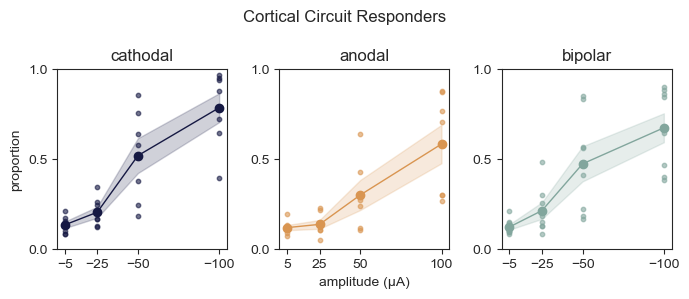

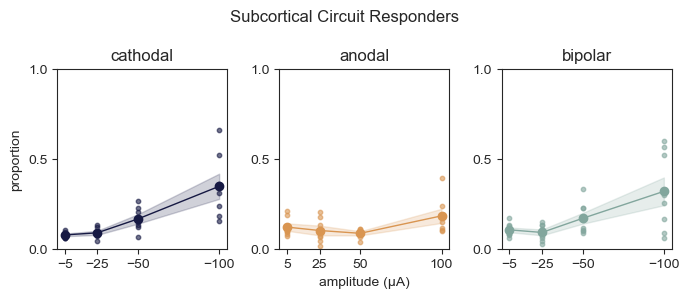

In [7]:
from scipy import stats
polarities = ['cathodal', 'anodal', 'bipolar']
colors = {'cathodal': cathodal_color, 'anodal': anodal_color, 'bipolar': bipolar_color}


for cr_sub in [circuit_response_cortical, circuit_response_subcortical]:
    if cr_sub == circuit_response_cortical:
        title = 'Cortical Circuit Responders'
    else:
        title = 'Subcortical Circuit Responders'
    fig, axes = plt.subplots(1, 3, figsize=(7,3))
    plt.suptitle(title, fontsize=12)


    for i, pol in enumerate(polarities):
        ax = axes[i]

        means = []
        sems  = []
        if pol == 'anodal':
            amps = [5, 25, 50, 100]
        else:
            amps = [-5, -25, -50, -100]
        for amp in amps:        
            vals = cr_sub[pol][amp]
            means.append(np.mean(vals))
            sems.append(stats.sem(vals))
            # Scatter individual points
            ax.scatter([amp]*len(vals), vals, color=colors[pol], alpha=0.6, s=10)

        means = np.array(means)
        sems = np.array(sems)
        
        # mean and sem error clouds
        ax.plot(amps, means, color=colors[pol], marker='o', markersize=6, lw=1)
        ax.fill_between(amps, means - sems, means + sems,
                            color=colors[pol], alpha=0.2)

        # Flip negative amplitudes so x goes from -5 to -100 if desired
        if pol != 'anodal':
            ax.invert_xaxis()

        ax.set_ylim(0, 1)
        ax.set_xticks(amps)
        ax.set_yticks([0, 0.5, 1])
        ax.set_title(pol)

    axes[1].set_xlabel('amplitude (µA)', fontsize=10)
    axes[0].set_ylabel('proportion', fontsize=10)


    plt.tight_layout()
    #if cr_sub == circuit_response_cortical:
        #plt.savefig(r"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\circuit_responders_cortical.pdf")
        #plt.savefig(r"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\circuit_responders_cortical.png")
    #else:
        #plt.savefig(r"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\circuit_responders_subcortical.pdf")
        #plt.savefig(r"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\circuit_responders_subcortical.png")


In [405]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# --- assemble dataframe ---
def build_df(cortical, subcortical):
    rows = []
    for region_name, cr_sub in zip(['cortical', 'subcortical'], [cortical, subcortical]):
        for pol, amps_dict in cr_sub.items():
            for amp, vals in amps_dict.items():
                for v in vals:
                    rows.append({
                        'Value': v,
                        'Amplitude': np.abs(amp),   # use positive amplitude values
                        'Polarity': pol,
                        'Region': region_name
                    })
    return pd.DataFrame(rows)

stats_df = build_df(circuit_response_cortical, circuit_response_subcortical)

# convert types
stats_df['Polarity'] = stats_df['Polarity'].astype('category')
stats_df['Region']   = stats_df['Region'].astype('category')

# full model
model = smf.ols('Value ~ Amplitude * C(Polarity) * C(Region)', data=stats_df).fit()
anova_table = anova_lm(model, typ=2)
print("\n=== ANOVA: Value ~ Amplitude * Polarity * Region ===")
print(anova_table)

# cathodal only
df_cath = stats_df[stats_df['Polarity'] == 'cathodal']
model_cath = smf.ols('Value ~ Amplitude * C(Region)', data=df_cath).fit()
anova_cath = anova_lm(model_cath, typ=2)
print("\n=== Cathodal only: Value ~ Amplitude * Region ===")
print(anova_cath)

# printing means and stds 
group_stats = (
    stats_df
    .groupby(['Polarity','Region','Amplitude'])
    .agg(mean=('Value','mean'),
         std=('Value','std'),
         n=('Value','size'))
    .reset_index()
)

print("\n=== Group Means and STDs ===")
print(group_stats.to_string(index=False))



=== ANOVA: Value ~ Amplitude * Polarity * Region ===
                                   sum_sq     df           F        PR(>F)
C(Polarity)                      0.220377    2.0    5.187369  6.551685e-03
C(Region)                        1.731289    1.0   81.504188  4.928966e-16
C(Polarity):C(Region)            0.044070    2.0    1.037341  3.567378e-01
Amplitude                        3.721145    1.0  175.180925  1.412856e-27
Amplitude:C(Polarity)            0.164069    2.0    3.861945  2.298978e-02
Amplitude:C(Region)              0.906432    1.0   42.672224  7.986905e-10
Amplitude:C(Polarity):C(Region)  0.008401    2.0    0.197748  8.207744e-01
Residual                         3.441159  162.0         NaN           NaN

=== Cathodal only: Value ~ Amplitude * Region ===
                       sum_sq    df          F        PR(>F)
C(Region)            0.804741   1.0  40.140590  5.659368e-08
Amplitude            1.831000   1.0  91.330532  4.858739e-13
Amplitude:C(Region)  0.313049   1.0  

C:\Users\jordan\AppData\Local\Temp\ipykernel_20000\307112800.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Polarity','Region','Amplitude'])


In [5]:
8.207744e-01

0.8207744

## Figure 7f -- ordering by time to peak inhibitory or excitatory circuit effect

In [269]:
from matplotlib.colors import TwoSlopeNorm
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks, savgol_filter

def calculate_MI(baseline, response):
    """
    Calculates the Modulation Index (MI) given baseline and response PSTH arrays.
    
    :param baseline: 1D array of baseline firing rates (spikes per second) for each trial.
    :param response: 1D array of response firing rates (spikes per second) for each trial.
    :return: 1D array of Modulation Index values for each trial.
    """
    # Calculate the modulation index for each trial
    mi = (response - baseline) / (response + baseline + np.finfo(float).eps) # Adding epsilon to avoid division by zero
    
    return mi

# --- helpers --- mainly for finding peak times and sorting
def _to_bins(ms):  # ms -> bins
    return max(1, int(round((ms/1000.0)/binsize)))

def smooth_gauss(x, sigma_bins, axis=1, mode='nearest'):
    # gaussian in bin units; sigma<=0 -> no-op
    x = np.asarray(x, float)
    if sigma_bins is None or sigma_bins <= 0:
        return x
    return gaussian_filter1d(x, sigma=float(sigma_bins), axis=axis, mode=mode)

def smooth_savgol(x, win_bins, poly, axis=1):
    # savgol with odd window; small windows -> no-op
    x = np.asarray(x, float)
    win = int(win_bins)
    if win < 3:
        return x
    if win % 2 == 0:
        win += 1
    return savgol_filter(x, window_length=win, polyorder=int(poly), axis=axis, mode='interp')

def local_center_of_mass(y, idx, halfw):
    # compute sub-bin time using weighted average in a local window
    n = y.shape[-1]
    a = max(0, idx-halfw); b = min(n, idx+halfw+1)
    w = y[a:b].astype(float)
    if w.sum() == 0:
        return idx
    i = np.arange(a, b)
    return np.sum(i*w)/np.sum(w)

# --- config ---
binsize = 0.005                         # seconds per bin (e.g., 0.005)
min_latency_s = 0.02                    # ignore peaks earlier than this og: 0.005
gauss_sigma_ms = 2.5                    # gaussian sigma in ms (good: 8–20 ms) og: 12.0
sg_win_bins = 5                          # savgol window (odd), if you choose sg og: 9
sg_poly = 2                              # savgol poly order og: 2
prominence = 0.2                         # minimum prominence in MI units (tune) og: 0.2
min_width_ms = 4                        # optional peak width threshold og: 10
local_cmass_ms = 6                      # window half-width for center-of-mass og: 15
rank_window_ms = 6                      # window half-width for peak magnitude og: 15

def pick_peak_times(resp, polarity="+"):
    """
    resp: (n_units, n_bins) smoothed
    polarity: '+' for excitatory, '-' for inhibitory
    returns: t_peak (s), peak_val (mean in local window), peak_idx (int)
    """
    n_units, n_bins = resp.shape
    t = np.arange(n_bins)*binsize
    min_lat_bins = int(np.floor(min_latency_s / binsize))
    width_bins = _to_bins(min_width_ms)
    cmass_bins = _to_bins(local_cmass_ms)
    rank_bins = _to_bins(rank_window_ms)

    t_peaks = np.full(n_units, np.nan)
    v_peaks = np.full(n_units, np.nan)
    i_peaks = np.full(n_units, -1, dtype=int)

    # prepare the signal for find_peaks
    sig = resp if polarity == "+" else -resp

    for u in range(n_units):
        y = sig[u].copy()
        # zero out pre-latency region
        if min_lat_bins > 0:
            y[:min_lat_bins] = -np.inf

        pk_kwargs = dict(prominence=prominence)
        if width_bins > 1:
            pk_kwargs["width"] = width_bins

        
        pks, props = find_peaks(y, **pk_kwargs)

        if pks.size == 0:
            # fallback to global best after latency
            idx = int(np.nanargmax(y[min_lat_bins:]) + min_lat_bins) if np.isfinite(y[min_lat_bins:]).any() else -1
            if idx < 0:
                continue
        else:
            # choose the most prominent peak
            if "prominences" in props:
                idx = int(pks[np.argmax(props["prominences"])])
            else:
                # fallback: choose the one with highest y
                idx = int(pks[np.argmax(y[pks])])

        # center-of-mass refinement on original polarity
        y_orig = resp[u] if polarity == "+" else -sig[u]  # back to signed
        cm = local_center_of_mass(np.maximum(y_orig, 0) if polarity == "+" else np.maximum(-y_orig, 0),
                                  idx, cmass_bins)
        t_peaks[u] = cm * binsize

        # stable peak magnitude = mean in local window on true-signed data
        a = max(0, idx-rank_bins); b = min(n_bins, idx+rank_bins+1)
        v = resp[u, a:b].mean() if polarity == "+" else resp[u, a:b].mean()  # signed already
        v_peaks[u] = v
        i_peaks[u] = idx

    return t_peaks, v_peaks, i_peaks

def _safe_tsort(t, ascending=True):
    t = np.asarray(t, float).copy()
    bad = ~np.isfinite(t)
    t[bad] = np.inf if ascending else -np.inf
    return t, bad

# --- heatmap plotting (smoothed data) ---
def plot_heat_sorted(ax, mat, order, t_peaks, title, binsize):
    t = np.arange(mat.shape[1]) * binsize
    vmax = np.nanpercentile(np.abs(mat), 99)
    norm = TwoSlopeNorm(vmin=-vmax, vcenter=0.0, vmax=vmax)
    im = ax.imshow(
        mat[order, :],
        aspect='auto', interpolation='nearest',
        extent=[t[0], t[-1] + binsize, 0, mat.shape[0]],
        norm=norm, cmap='coolwarm'
    )
    ax.plot(
    t_peaks[order],
    mat.shape[0] - np.arange(mat.shape[0]) - 0.5,  # invert y
    'k.', ms=2)
    ax.set_title(title)
    ax.set_xlabel('time from stim (s)')
    ax.set_ylabel('units (sorted by peak time)')
    return im


### example to establish pipeline

In [ ]:
# jlh34
# lets do -50 cathodal first
run = 11 
stim_times = jlh34.trials[jlh34.trials['run'] == run].start_time.values

jlh34_sig_50c = jlh34.units[(jlh34.units.group == 'good') & (jlh34.units.slope_outlier == False) 
                            & (jlh34.units[f'r{run}'] == 'sig') 
                            & (jlh34.units.brain_reg.str.contains('area', case=False))]


from jlh_ephys.plotter import raster, psth 
binsize = 0.005
window = 0.5

mi_list = [] 
unit_ids = []

for i, unit in jlh34_sig_50c.iterrows():
    psth_r, _, _ = psth(unit.spike_times, stim_times, pre=0, post=window, bin_size=binsize, var= 'sem', plot=False)
    psth_b, _, _ = psth(unit.spike_times, stim_times, pre=-1, post=-0.5, bin_size=binsize, var= 'sem', plot=False)
    mean_baseline = np.median(psth_b) / binsize
    psth_r = np.array(psth_r) / binsize
    mi_list.append(calculate_MI(mean_baseline, psth_r))
    unit_ids.append(unit.unit_id)
    
mi_array = np.array(mi_list)


probe unit_id group  depth  xpos    ypos  no_spikes  firing_rate KSlabel  \
id                                                                            
78     A    A274  good  900.0  11.0  1300.0       6280     1.064474    good   
79     A    A277  good  880.0  59.0  1320.0      34211     5.798842    good   
80     A    A278  good  880.0  27.0  1320.0        822     0.139331    good   
81     A    A280  good  860.0  11.0  1340.0      49128     8.327307     mua   
82     A    A282  good  860.0  11.0  1340.0      33402     5.661714    good   

    KSamplitude  ...      r18      r19      r20      r21      r22      r23  \
id               ...                                                         
78        529.1  ...      sig      sig  non-sig  non-sig      sig  non-sig   
79       1419.7  ...      sig      sig  non-sig  non-sig      sig      sig   
80       1212.2  ...      sig  non-sig  non-sig  non-sig  non-sig  non-sig   
81       2061.9  ...      sig      sig      sig  non-sig      sig  non-sig   
82        990.5  ...  non-sig  non-sig  non-sig  non-sig  non-sig  non-sig   

    r24      r25  r26  r27  
id                          
78  sig  non-sig  sig  sig  
79  sig      sig  sig  sig  
80  sig  non-sig  sig  sig  
81  sig      sig  sig  sig  
82  sig  non-sig  sig  sig  

[5 rows x 50 columns]

In [270]:
# start with jlh31 then extrapolate to others 
# lets do -50 cathodal first
run = 20 
stim_times = jlh31.trials[jlh31.trials['run'] == run].start_time.values

# stim coordinates (AP, DV, ML)
stim_ccf = np.array(jlh31.trials.loc[jlh31.trials.contact_negative == 16, "contact_negative_coords"].values[0])
# stack all unit coords
unit_ccf = np.vstack(jlh31.units["ccf_coordinates"].values)  # shape (n_units, 3)
# euclidean distance
dists = np.linalg.norm(unit_ccf - stim_ccf, axis=1)
# assign sign based on DV (index 1)
signs = np.where(unit_ccf[:, 1] < stim_ccf[1], -1, 1)
signed_dists = dists * signs
# store
jlh31.units["dist_from_stim"] = signed_dists

jlh31_sig_50c = jlh31.units[(jlh31.units.group == 'good') & (jlh31.units.slope_outlier == False) 
                            & (jlh31.units[f'r{run}'] == 'sig') 
                            & (jlh31.units.brain_reg.str.contains('area', case=False))]



from jlh_ephys.plotter import raster, psth 
binsize = 0.002
window = 0.5

mi_list = [] 
unit_ids = []
dists_list = []

for i, unit in jlh31_sig_50c.iterrows():
    psth_r, _, _ = psth(unit.spike_times, stim_times, pre=0, post=window, bin_size=binsize, var= 'sem', plot=False)
    psth_b, _, _ = psth(unit.spike_times, stim_times, pre=-1, post=-0.5, bin_size=binsize, var= 'sem', plot=False)
    mean_baseline = np.median(psth_b) / binsize
    
    psth_r = np.array(psth_r) / binsize
    mi_list.append(calculate_MI(mean_baseline, psth_r))
    unit_ids.append(unit.unit_id)
    dists_list.append(unit.dist_from_stim)
mi_array = np.array(mi_list)
dists_array = np.array(dists_list)

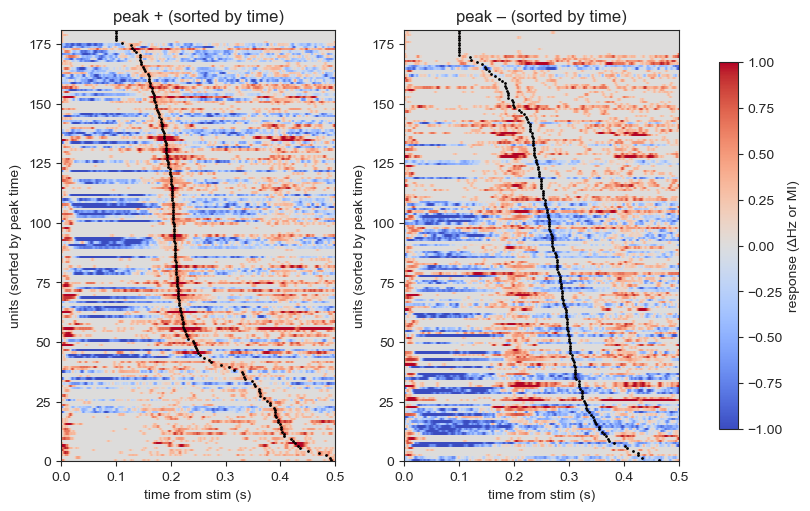

In [272]:

resp = np.asarray(mi_array) # (n_units, n_bins) 
uids = np.asarray(unit_ids)

# --- config ---
binsize = float(binsize)                 # seconds per bin (e.g., 0.005)
min_latency_s = 0.1                    # ignore peaks earlier than this og: 0.005
gauss_sigma_ms = 2.5                    # gaussian sigma in ms (good: 8–20 ms) og: 12.0
sg_win_bins = 5                          # savgol window (odd), if you choose sg og: 9
sg_poly = 2                              # savgol poly order og: 2
prominence = 0.2                         # minimum prominence in MI units (tune) og: 0.2
min_width_ms = 4                        # optional peak width threshold og: 10
local_cmass_ms = 6                      # window half-width for center-of-mass og: 15
rank_window_ms = 6                      # window half-width for peak magnitude og: 15


# --- pipeline ---
# 1) smooth (choose one; gaussian tends to be best for your binning)
sigma_bins = gauss_sigma_ms/1000.0 / binsize
resp_smooth = smooth_gauss(np.asarray(resp, float), sigma_bins=sigma_bins)
# alt:
# resp_smooth = smooth_savgol(np.asarray(resp, float), sg_win_bins, sg_poly)

# 2) pick peaks for + and -
t_peak_pos, peak_pos, idx_pos = pick_peak_times(resp_smooth, polarity="+")
t_peak_neg, peak_neg, idx_neg = pick_peak_times(resp_smooth, polarity="-")

# 3) order by magnitude (robust mean around the peak)
pos_order = np.argsort(-peak_pos)  # strongest + first
neg_order = np.argsort(peak_neg)   # most negative first

uids = np.asarray(uids).astype(str)
pos_sort = {
    "unit_ids": uids[pos_order],
    "order_idx": pos_order,
    "t_peak": t_peak_pos[pos_order],
    "peak_val": peak_pos[pos_order],
}
neg_sort = {
    "unit_ids": uids[neg_order],
    "order_idx": neg_order,
    "t_peak": t_peak_neg[neg_order],
    "peak_val": peak_neg[neg_order],
}

from matplotlib.colors import TwoSlopeNorm


tpos, bad_pos = _safe_tsort(t_peak_pos, ascending=True)
tneg, bad_neg = _safe_tsort(t_peak_neg, ascending=True)

pos_order = np.lexsort((-np.asarray(peak_pos, float), tpos))   # time ↑, strength ↓
neg_order = np.lexsort(( np.asarray(peak_neg, float), tneg))   # time ↑, more negative first



fig, axes = plt.subplots(1, 2, figsize=(8, 5), constrained_layout=True)
im1 = plot_heat_sorted(axes[0], resp_smooth, pos_order, t_peak_pos, 'peak + (sorted by time)', binsize)
im2 = plot_heat_sorted(axes[1], resp_smooth, neg_order, t_peak_neg, 'peak – (sorted by time)', binsize)
cbar = fig.colorbar(im2, ax=axes.ravel().tolist(), shrink=0.85)
cbar.set_label('response (ΔHz or MI)')


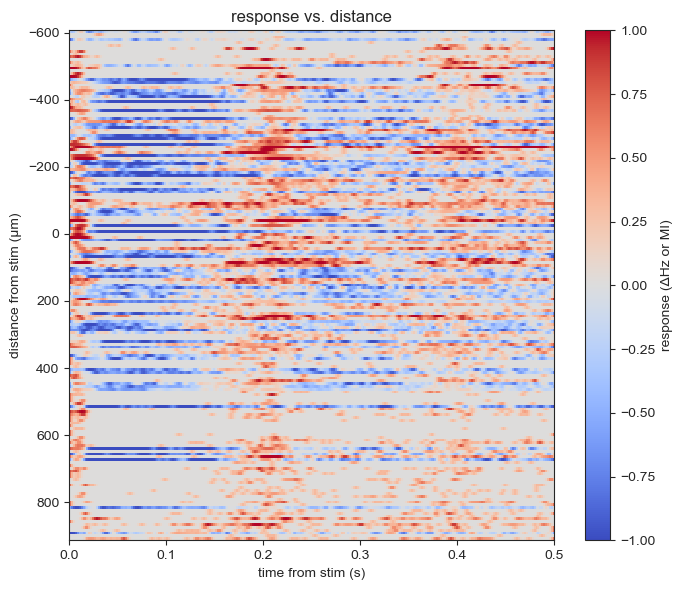

In [ ]:
dists = dists_array
# --- remove NaNs and sort by distance ---
mask = np.isfinite(dists) & np.isfinite(np.nanmax(resp_smooth, axis=1))
resp_valid = resp_smooth[mask]
d_valid = np.asarray(dists)[mask]

# sort ascending (e.g., above stim → negative → top)
order = np.argsort(d_valid)
resp_sorted = resp_valid[order]
d_sorted = d_valid[order]

# --- prepare plot data ---
time = np.arange(resp_sorted.shape[1]) * binsize
vmax = np.nanpercentile(np.abs(resp_sorted), 99)
norm = TwoSlopeNorm(vmin=-vmax, vcenter=0.0, vmax=vmax)

# --- make the heatmap ---
fig, ax = plt.subplots(figsize=(7, 6))
im = ax.imshow(
    resp_sorted,
    aspect='auto',
    interpolation='nearest',
    extent=[time[0], time[-1] + binsize, d_sorted[0], d_sorted[-1]],
    norm=norm,
    cmap='coolwarm',
    origin='lower'
)

ax.set_xlabel("time from stim (s)")
ax.set_ylabel("distance from stim (µm)")
ax.set_title("response vs. distance")
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("response (ΔHz or MI)")
ax.invert_yaxis()

plt.tight_layout()



In [273]:
save_path = r"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\sorted_arrays_forbrainrender"

os.makedirs(save_path, exist_ok=True)

np.savez_compressed(os.path.join(save_path, 'jlh31_cathodal50uA_mi_pos_sorted.npz'), **pos_sort)
np.savez_compressed(os.path.join(save_path, 'jlh31_cathodal50uA_mi_neg_sorted.npz'), **neg_sort)

In [ ]:
# test how to parse it
mi_neg_sorted_dict = np.load(r"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\sorted_arrays_forbrainrender\jlh31_cathodal50uA_mi_neg_sorted.npz", allow_pickle=True)

### apply it to all recordings

In [227]:
from jlh_ephys.plotter import raster, psth 
amp = -50
pol = 'monopolar'
binsize = 0.005
window = 0.5

monopolar_recordings = [r for r in recordings if r.mouse != 'jlh39' and r.mouse != 'jlh49v1']
mi_list = []
units_ids = []
dists_list = []
for r in monopolar_recordings:
    print(r.mouse)
    stim_times = choose_stim_parameter(r.trials, polarity = pol, amp = amp)[0:75]
    run = r.trials[(r.trials['amplitude'] == -50) & (r.trials['polarity'] == 'monopolar')].run.unique()
    if len(run) > 0:
        run = run[0]
    else: 
        print(f'no -50 monopolar in {r.mouse}')
        run = 0
    stim_ccf = np.array(r.trials["contact_negative_coords"].values[0])
    if r.mouse == 'jlh32':
        stim_ccf = np.array(r.trials["contact_positive_coords"].values[0])

    unit_ccf = np.vstack(r.units["ccf_coordinates"].values)  # shape (n_units, 3)
    # euclidean distance
    dists = np.linalg.norm(unit_ccf - stim_ccf, axis=1)
    # assign sign based on DV (index 1)
    signs = np.where(unit_ccf[:, 1] < stim_ccf[1], -1, 1)
    signed_dists = dists * signs
    
    r.units['dist_from_stim'] = signed_dists
    rsig_50c = r.units[(r.units.group == 'good') & (r.units.slope_outlier == False)
                            & (r.units[f'r{run}'] == 'sig') 
                            & (r.units.brain_reg.str.contains('area', case=False))]
    
    for i, unit in rsig_50c.iterrows():
        psth_r, _, _ = psth(unit.spike_times, stim_times, pre=0, post=window, bin_size=binsize, var= 'sem', plot=False)
        psth_b, _, _ = psth(unit.spike_times, stim_times, pre=-1, post=-0.5, bin_size=binsize, var= 'sem', plot=False)
        mean_baseline = np.median(psth_b) / binsize
        
        psth_r = np.array(psth_r) / binsize
        mi_list.append(calculate_MI(mean_baseline, psth_r))
        units_ids.append(f'{r.mouse}_{unit.unit_id}')
        dists_list.append(unit.dist_from_stim)

mi_array = np.array(mi_list)
dists_array = np.array(dists_list)
uids = np.asarray(units_ids).astype(str)

jlh31
jlh32
jlh33
jlh34
jlh40
jlh48
jlh53concat


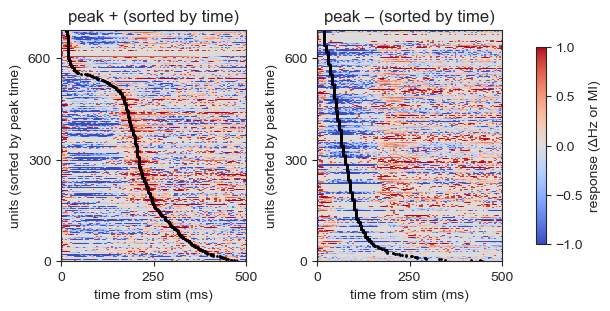

In [268]:
resp = np.asarray(mi_array) # (n_units, n_bins) 
uids = np.asarray(units_ids).astype(str)

# --- config ---               # seconds per bin (e.g., 0.005)
min_latency_s = 0.02                    # ignore peaks earlier than this og: 0.005
gauss_sigma_ms = 2.5                    # gaussian sigma in ms (good: 8–20 ms) og: 12.0
sg_win_bins = 5                          # savgol window (odd), if you choose sg og: 9
sg_poly = 2                              # savgol poly order og: 2
prominence = 0.2                         # minimum prominence in MI units (tune) og: 0.2
min_width_ms = 4                        # optional peak width threshold og: 10
local_cmass_ms = 6                      # window half-width for center-of-mass og: 15
rank_window_ms = 6                      # window half-width for peak magnitude og: 15


# --- pipeline ---
# 1) smooth 
sigma_bins = gauss_sigma_ms/1000.0 / binsize
resp_smooth = smooth_gauss(np.asarray(resp, float), sigma_bins=sigma_bins)

# 2) pick peaks for + and -
t_peak_pos, peak_pos, idx_pos = pick_peak_times(resp_smooth, polarity="+")
t_peak_neg, peak_neg, idx_neg = pick_peak_times(resp_smooth, polarity="-")

# 3) order by magnitude (robust mean around the peak)
pos_order = np.argsort(-peak_pos)  # strongest + first
neg_order = np.argsort(peak_neg)   # most negative first

uids = np.asarray(uids).astype(str)
pos_sort = {
    "unit_ids": uids[pos_order],
    "order_idx": pos_order,
    "t_peak": t_peak_pos[pos_order],
    "peak_val": peak_pos[pos_order],
}
neg_sort = {
    "unit_ids": uids[neg_order],
    "order_idx": neg_order,
    "t_peak": t_peak_neg[neg_order],
    "peak_val": peak_neg[neg_order],
}

tpos, bad_pos = _safe_tsort(t_peak_pos, ascending=True)
tneg, bad_neg = _safe_tsort(t_peak_neg, ascending=True)

pos_order = np.lexsort((-np.asarray(peak_pos, float), tpos))   # time ↑, strength ↓
neg_order = np.lexsort(( np.asarray(peak_neg, float), tneg))   # time ↑, more negative first

fig, axes = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
im1 = plot_heat_sorted(axes[0], resp_smooth, pos_order, t_peak_pos, 'peak + (sorted by time)', binsize)
im2 = plot_heat_sorted(axes[1], resp_smooth, neg_order, t_peak_neg, 'peak – (sorted by time)', binsize)
cbar = fig.colorbar(im2, ax=axes.ravel().tolist(), shrink=0.85)
cbar.set_label('response (ΔHz or MI)')

for ax in axes:
    ax.set_yticks([0, 300, 600])
    ax.set_xticks([0, 0.25, 0.5], ['0', '250', '500'])
    ax.set_xlabel('time from stim (ms)')
save_path = r"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\sorted_circuits"
os.makedirs(save_path, exist_ok=True)
#fig.savefig(os.path.join(save_path, 'all_monopolar_cathodal50uA_mi_sorted_heatmap.png'))
#fig.savefig(os.path.join(save_path, 'all_monopolar_cathodal50uA_mi_sorted_heatmap.pdf'))


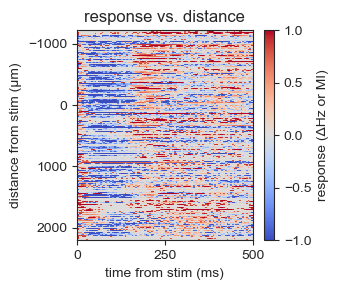

In [262]:
dists = dists_array
# --- remove NaNs and sort by distance ---
mask = np.isfinite(dists) & np.isfinite(np.nanmax(resp_smooth, axis=1))
resp_valid = resp_smooth[mask]
d_valid = np.asarray(dists)[mask]

# sort ascending (e.g., above stim → negative → top)
order = np.argsort(d_valid)
resp_sorted = resp_valid[order]
d_sorted = d_valid[order]

# --- prepare plot data ---
time = np.arange(resp_sorted.shape[1]) * binsize
vmax = np.nanpercentile(np.abs(resp_sorted), 99)
norm = TwoSlopeNorm(vmin=-vmax, vcenter=0.0, vmax=vmax)

# --- make the heatmap ---
fig, ax = plt.subplots(figsize=(3.5, 3))
im = ax.imshow(
    resp_sorted,
    aspect='auto',
    interpolation='nearest',
    extent=[time[0], time[-1] + binsize, d_sorted[0], d_sorted[-1]],
    norm=norm,
    cmap='coolwarm',
    origin='lower'
)

ax.set_xlabel("time from stim (ms)")
ax.set_ylabel("distance from stim (µm)")
ax.set_title("response vs. distance")
ax.set_yticks([-1000, 0, 1000, 2000])
ax.set_xticks([0, 0.25, 0.5],['0', '250', '500'] )
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("response (ΔHz or MI)")
ax.invert_yaxis()

plt.tight_layout()
save_path = r"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\sorted_circuits"
os.makedirs(save_path, exist_ok=True)

#fig.savefig(os.path.join(save_path, 'all_monopolar_cathodal50uA_mi_sorteddistance_heatmap.png'))
#fig.savefig(os.path.join(save_path, 'all_monopolar_cathodal50uA_mi_sorteddistance_heatmap.pdf'))

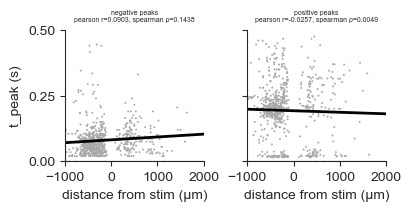

In [264]:
dists = np.asarray(dists_array, float)
tneg  = np.asarray(t_peak_neg, float)
tpos  = np.asarray(t_peak_pos, float)

# masks: keep only finite
m_neg = np.isfinite(dists) & np.isfinite(tneg)
m_pos = np.isfinite(dists) & np.isfinite(tpos)

d_plot = dists

# simple linear fits
def _fit_line(x, y):
    if x.size < 2:
        return None
    p = np.polyfit(x, y, 1)  # y = p[0]*x + p[1]
    xs = np.linspace(np.nanmin(x), np.nanmax(x), 200)
    ys = p[0]*xs + p[1]
    return xs, ys, p

from scipy.stats import linregress
def fit_line(x, y):
    x = np.asarray(x, float); y = np.asarray(y, float)
    m = np.isfinite(x) & np.isfinite(y)
    x = x[m]; y = y[m]
    if x.size < 2 or np.allclose(x, x[0]): 
        return None
    res = linregress(x, y)  # slope, intercept, rvalue, pvalue, stderr
    xs = np.linspace(x.min(), x.max(), 200)
    ys = res.slope * xs + res.intercept
    return xs, ys, res
fit_neg = fit_line(d_plot[m_neg], tneg[m_neg])
fit_pos = fit_line(d_plot[m_pos], tpos[m_pos])

# correlations (optional)

from scipy.stats import pearsonr, spearmanr
pr_neg = pearsonr(d_plot[m_neg], tneg[m_neg]) if m_neg.any() else (np.nan, np.nan)
sp_neg = spearmanr(d_plot[m_neg], tneg[m_neg]) if m_neg.any() else (np.nan, np.nan)
pr_pos = pearsonr(d_plot[m_pos], tpos[m_pos]) if m_pos.any() else (np.nan, np.nan)
sp_pos = spearmanr(d_plot[m_pos], tpos[m_pos]) if m_pos.any() else (np.nan, np.nan)


# plot
fig, axes = plt.subplots(1, 2, figsize=(4, 2), sharey=True, constrained_layout=True)

size = 2 
dotcolor = 'darkgray'
linecolor = 'k'
fontsize = 5

# negative peaks
ax = axes[0]
ax.scatter(d_plot[m_neg], tneg[m_neg], s=size, color = dotcolor, alpha=1, edgecolor='none')
if fit_neg:
    xs, ys, p = fit_neg
    ax.plot(xs, ys, color = linecolor, lw=2, alpha=1)
ax.axhline(0, ls='--', lw=1, alpha=0.5)
ax.set_title(f'negative peaks\npearson r={pr_neg[0]:.4f}, spearman ρ={sp_neg[0]:.4f}', fontsize = fontsize)
ax.set_xlabel('distance from stim (µm)')
ax.set_ylabel('t_peak (s)')

# positive peaks
ax = axes[1]
ax.scatter(d_plot[m_pos], tpos[m_pos], s=size, color = dotcolor, alpha=1, edgecolor='none')
if fit_pos:
    xs, ys, p = fit_pos
    ax.plot(xs, ys, color = linecolor, lw=2, alpha=1)
ax.axhline(0, ls='--', lw=1, alpha=0.5)
ax.set_title(f'positive peaks\npearson r={pr_pos[0]:.4f}, spearman ρ={sp_pos[0]:.4f}', fontsize = fontsize)
ax.set_xlabel('distance from stim (µm)')

# nice x-lims
for ax in axes:
    ax.set_xlim(-1000, 2000)
    ax.set_xticks([-1000, 0, 1000, 2000])
    ax.set_ylim(0, 0.5)
    ax.set_yticks([0, 0.25, 0.50])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
save_path = r"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\sorted_circuits"
os.makedirs(save_path, exist_ok=True)

#fig.savefig(os.path.join(save_path, 'all_monopolar_cathodal50uA_mi_distance_vs_peaktime.png'))
#fig.savefig(os.path.join(save_path, 'all_monopolar_cathodal50uA_mi_distance_vs_peaktime.pdf'))

## Figure 7a -- example rasters and PSTH

These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [16 10]
Returning the first one: 16


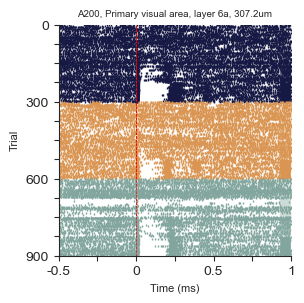

In [10]:
from jlh_ephys.plotter import raster, psth 

pre = 0.5 
post = 1 

r = jlh31
for unit_id in ["A200"]:
    
    # unit details 
    unit_row = r.units[r.units.unit_id == unit_id]
    spike_times = unit_row.spike_times.values[0]
    unit_ccf = unit_row.ccf_coordinates.values[0]
    unit_brain_reg = unit_row.brain_reg.values[0]
    
    
    stim_times_5c = choose_stim_parameter(r.trials, amp = -5, pulse_duration = 100, polarity = 'monopolar')[0:75]
    stim_times_25c = choose_stim_parameter(r.trials, amp = -25, pulse_duration = 100, polarity = 'monopolar')[0:75]
    stim_times_50c = choose_stim_parameter(r.trials, amp = -50, pulse_duration = 100, polarity = 'monopolar')[0:75]
    stim_times_100c = choose_stim_parameter(r.trials, amp = -100, pulse_duration = 100, polarity = 'monopolar')[0:75]


    stim_times_5a = choose_stim_parameter(r.trials, amp = 5, pulse_duration = 100, polarity = 'monopolar')[0:75]
    stim_times_25a = choose_stim_parameter(r.trials, amp = 25, pulse_duration = 100, polarity = 'monopolar')[0:75]
    stim_times_50a = choose_stim_parameter(r.trials, amp = 50, pulse_duration = 100, polarity = 'monopolar')[0:75]
    stim_times_100a = choose_stim_parameter(r.trials, amp = 100, pulse_duration = 100, polarity = 'monopolar')[0:75]
    
    stim_times_5b = choose_stim_parameter(r.trials, amp = -5, pulse_duration = 100, polarity = 'bipolar')[0:75]
    stim_times_25b = choose_stim_parameter(r.trials, amp = -25, pulse_duration = 100, polarity = 'bipolar')[0:75]
    stim_times_50b = choose_stim_parameter(r.trials, amp = -50, pulse_duration = 100, polarity = 'bipolar')[0:75]
    stim_times_100b = choose_stim_parameter(r.trials, amp = -100, pulse_duration = 100, polarity = 'bipolar')[0:75]

    buffer = np.zeros(75*4)

    stim_timesc = np.concatenate([stim_times_5c, stim_times_25c, stim_times_50c, stim_times_100c, buffer, buffer])
    stim_timesa = np.concatenate([buffer, stim_times_5a, stim_times_25a, stim_times_50a, stim_times_100a, buffer])
    stim_timesb = np.concatenate([buffer, buffer, stim_times_5b, stim_times_25b, stim_times_50b, stim_times_100b])
    
    stim_contact_ccf = r.trials.contact_negative_coords.values[0]
    
    
    distance_from_stim = np.linalg.norm(unit_ccf - stim_contact_ccf) # distance in microns
    
    fig, ax = plt.subplots(figsize = (3,3))
    
    # raster for cathodal
    raster(spike_times, stim_timesc, pre = pre, post = post, 
        color = cathodal_color, linewidth = 0.6, labelsize = 8, 
        axis_labelsize = 10, marker = '|', marker_size = 1,
        axes = ax)
    
    # raster for anodal
    raster(spike_times, stim_timesa, pre = pre, post = post, 
        color = anodal_color, linewidth = 0.6, labelsize = 8, 
        axis_labelsize = 10, marker = '|', marker_size = 1,
        axes = ax)
    
    # raster for bipolar 
    raster(spike_times, stim_timesb, pre = pre, post = post, 
        color = bipolar_color, linewidth = 0.6, labelsize = 8, 
        axis_labelsize = 10, marker = '|', marker_size = 1,
        axes = ax)
    
    #xlabels = [-5, 0, 5, 10]#np.round(np.linspace(-pre, post, 5) * 1000, 1)
    #xlabels = xlabels.astype(int)
    #ax.set_xticklabels(xlabels)
    ax.set_xticks(np.linspace(-pre, post, 7), ['-0.5', '', '0', '', '0.5', '', '1'])
    
    
    # cathodal shading 
    num_trials  = 75*4
    start = 0
    end = num_trials + start 
    chunk_size  = 75                 # change if you ever use a different batch size
    base_alpha  = 0.1               # starting transparency
    alpha_step  = 0.3               # how much darker each block gets
    
    for i, start in enumerate(range(0, num_trials, chunk_size)):
        end   = start + chunk_size
        shade = base_alpha + i * alpha_step
        ax.axhspan(start,  
                end,
                xmin = 0.95,
                xmax = 1.0,
                facecolor=cathodal_color,
                alpha=shade,
                zorder=1)     
    
    # anodal shading 
    num_trials  = 75*4
    start = 75*4
    end = num_trials + start
    for i, start in enumerate(range(75*4, num_trials + 75*4, chunk_size)):
        end   = start + chunk_size
        shade = base_alpha + i * alpha_step
        ax.axhspan(start,  
                end,
                xmin = 0.95,
                xmax = 1.0,
                facecolor=anodal_color,
                alpha=shade,
                zorder=1)
        
    # bipolar shading
    num_trials  = 75*4
    start = 75*4 * 2
    end = num_trials + start
    for i, start in enumerate(range(75*4 * 2, num_trials + 75*4 * 2, chunk_size)):
        end   = start + chunk_size
        shade = base_alpha + i * alpha_step
        ax.axhspan(start,   
                end,
                xmin = 0.95,
                xmax = 1.0,
                facecolor=bipolar_color,
                alpha=shade,
                zorder=1)
        
    ax.set_title(f'{unit_id}, {unit_brain_reg}, {distance_from_stim:.1f}um', fontsize = 7)
    ax.set_yticks([0, 75, 150, 225, 300, 375, 450, 525, 600, 675, 750, 825, 900],
                [0, '', '', '', 300, '', '', '', 600, '', '', '', 900])
    
    save_folder = fr"C:\Users\jordan\Documents\combined_figs\single_unit\polarity_amp_rasters\{r.mouse}\10ms"
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    #plt.savefig(os.path.join(save_folder, f'{unit_id}_raster.pdf'))
    #plt.savefig(os.path.join(save_folder, f'{unit_id}_raster.png'))

## Figure 7c,d Modulation index

In [11]:
def calculate_MI(baseline, response):
    """
    Calculates the Modulation Index (MI) given baseline and response PSTH arrays.
    
    :param baseline: 1D array of baseline firing rates (spikes per second) for each trial.
    :param response: 1D array of response firing rates (spikes per second) for each trial.
    :return: 1D array of Modulation Index values for each trial.
    """
    # Calculate the modulation index for each trial
    mi = (response - baseline) / (response + baseline + np.finfo(float).eps) # Adding epsilon to avoid division by zero
    
    return mi

In [315]:
# calculates MI for each unit in each recording... assings array to units dfs 
from tqdm.notebook import tqdm
## MI 
binsize = 0.01
window = 0.5


times = np.arange(0, int(window/binsize)) * binsize * 1000  # Convert to milliseconds
n_bins = len(times)
#time_bins = np.arange(0, int(window/binsize)) *binsize * 1000
amps = [-5, -25, -50, -100]
pols = ['anodal', 'cathodal', 'bipolar']


MI_columns = []

for pol in pols:
    for amp in amps:
        if pol == 'anodal':
            amp = np.abs(amp)
        label = f'{amp}uA_{pol}'
        MI_columns.append(label)


for r in tqdm(recordings, desc='Recordings'):
    for pol in pols:
        for i, amp in enumerate(amps):
            if pol == 'anodal':
                amp = np.abs(amp)
            
            updated_pol = 'monopolar' if pol == 'anodal' or pol == 'cathodal' else 'bipolar'
            
            # handling edge cases
            if r.mouse == 'jlh33' and amp == 50:
                updated_pol = 'bipolar'
            
            stim_times = choose_stim_parameter(r.trials, amp=amp, pulse_number=1, pulse_duration=100, polarity=updated_pol)
            label = f'{amp}uA_{pol}'
            if len(stim_times) > 75:
                stim_times = stim_times[:75]
            if len(stim_times) == 0:
                print(f'{r.mouse} {amp} {pol} has no stim times')
                r.units[label] = np.nan * len(r.units)
            else:
                label = f'{amp}uA_{pol}'
                mi_list = []
                for i, unit in r.units.iterrows():
                    psth_r, _, _ = psth(unit.spike_times, stim_times, pre=0, post=window, bin_size=binsize, var='sem', plot=False)
                    psth_b, _, _ = psth(unit.spike_times, stim_times, pre=-1, post=-0.5, bin_size=binsize, var='sem', plot=False)
                    mean_baseline = np.median(psth_b) / binsize
                    psth_r = np.array(psth_r) / binsize
                    mi_list.append(calculate_MI(mean_baseline, psth_r))
                r.units[label] = mi_list
                
units_list = []
for r in recordings:
    r.units['recording'] = r.mouse
    units_list.append(r.units)
units_concat = pd.concat(units_list)
units_concat = units_concat[units_concat['slope_outlier'] == False]

Recordings:   0%|          | 0/9 [00:00<?, ?it/s]

These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [ 5 15  2]
Returning the first one: 5
These are the multiple unique cathodal [ 5 15  2]
Returning the first one: 5
These are the multiple unique cathodal [ 5 15  2]
Returning the first one: 5
These are the multiple unique cathodal [15 11]
Returning the first one: 15
These are the multiple unique cathodal [15 11]
Returning the first one: 15
These are the multiple unique cathodal [15 11]
Returning the first one: 15
These are the multiple unique cathodal [15 11]
Returning the first one: 15
jlh39 5 anodal has no stim times
jlh39 25 anodal has no stim times
jlh39 50 anodal has no stim times
jlh39 100 anodal has no stim times
jlh39 -5 cathodal has no stim times
jlh39 -25 cathodal has no stim times
jlh39 -50 cathodal has no stim time

In [316]:
import numpy as np

# curated list of subcortical regions
subcortical = [
    'Postsubiculum', 'dorsal hippocampal commissure', 
    'Dentate gyrus molecular layer', 'Dentate gyrus granule cell layer', 
    'alveus', 'Superior colliculus, motor related, intermediate gray layer', 
    'Superior colliculus, motor related, intermediate white layer', 
    'Hippocampal formation', 'Midbrain', 'brachium of the superior colliculus', 
    'Field CA3', 'Field CA2'
]

# start with good units filter
good_units = units_concat[units_concat.group == 'good']
good_units = good_units[good_units.slope_outlier == False]

# assign cortical/subcortical labels
def classify_region(region):
    if 'area' in region:  # anything with "area" in the name
        return 'Cortical'
    elif region in subcortical:
        return 'Subcortical'
    else:
        return np.nan   # drop ambiguous/white matter stuff

good_units['sub_cort'] = good_units['brain_reg'].apply(classify_region)

# keep only cortical or subcortical
good_units = good_units.dropna(subset=['sub_cort'])
unique_brain_regions = good_units['sub_cort'].unique()


In [317]:
good_units[good_units['sub_cort'] == 'Subcortical'].brain_reg.unique()

array(['Postsubiculum', 'dorsal hippocampal commissure',
       'Dentate gyrus molecular layer',
       'Dentate gyrus granule cell layer', 'alveus',
       'Superior colliculus, motor related, intermediate gray layer',
       'Superior colliculus, motor related, intermediate white layer',
       'Hippocampal formation', 'Midbrain',
       'brachium of the superior colliculus', 'Field CA3', 'Field CA2'],
      dtype=object)

In [318]:
good_units[good_units['sub_cort'] == 'Cortical'].brain_reg.unique()

array(['Primary visual area, layer 6a', 'Primary visual area, layer 5',
       'Primary visual area, layer 4', 'Primary visual area, layer 2/3',
       'Primary visual area, layer 6b', 'Lateral visual area, layer 6a',
       'posteromedial visual area, layer 2/3',
       'Rostrolateral area layer 6a', 'Anterior area layer 6a',
       'Rostrolateral area layer 5', 'Anterior area layer 5',
       'Rostrolateral area layer 4', 'Anterior area layer 4',
       'Rostrolateral area layer 2/3', 'Anterior area layer 2/3',
       'Primary visual area layer 6a', 'Primary visual area layer 5',
       'Primary visual area layer 4', 'Primary visual area layer 2/3',
       'Primary visual area layer 1', 'Anteromedial visual area layer 6a',
       'Anteromedial visual area layer 5',
       'Anteromedial visual area, layer 2/3',
       'Primary visual area, layer 1', 'Anterior area, layer 6b',
       'Anterior area, layer 6a', 'Lateral visual area, layer 6b',
       'Anteromedial visual area, layer 1',

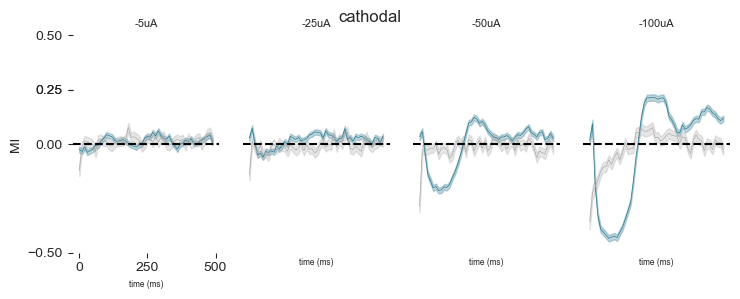

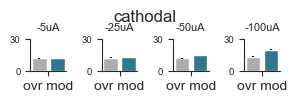

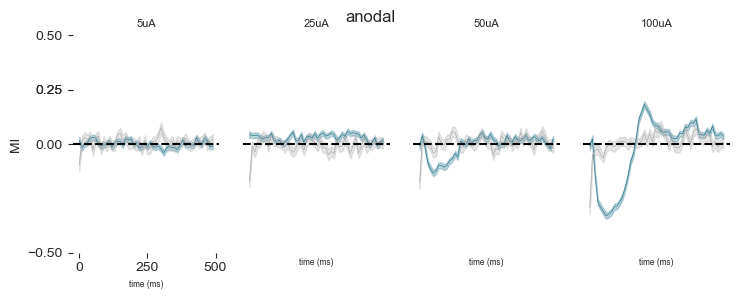

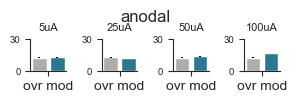

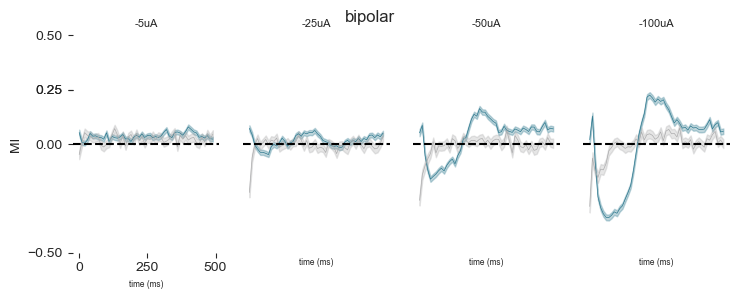

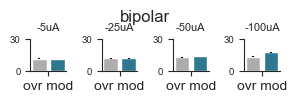

In [376]:
from scipy.stats import sem 
for pol in ['cathodal', 'anodal', 'bipolar']:
    fig, axes = plt.subplots(1, 4, figsize = (7.5, 3))
    fig_bar, axes_bar = plt.subplots(1,4, figsize = (3,1))
    
    for x, amp in enumerate([-5, -25, -50, -100]):
        if pol == 'anodal':
            amp = np.abs(amp)
        ax  = axes[x]
        ax_bar = axes_bar[x]
        for i, region in enumerate(['Cortical', 'Subcortical']):
            df_by_region = good_units[good_units['sub_cort'] == region]
            if amp == -100 or pol != 'monopolar':
                df_by_region = df_by_region[df_by_region['recording'] != 'jlh39']
            
            mi_df = df_by_region[df_by_region[f'{amp}uA_{pol}'].notna()]
            mi_values = np.array(mi_df[f'{amp}uA_{pol}'].tolist())
                        
            # calculate mean and SEM for this brain region
            mi_mean = np.nanmean(mi_values, axis=0)
            mi_sem = sem(mi_values, axis=0)

            # Plot Mean MI line with SEM error clouds for this brain region
            color = '#2D788E' if region == 'Cortical' else '#ADADAE'
            
            ax.plot(times, mi_mean, label=f'{region}_{amp}uA', color=color, lw = 0.5, alpha=1)
            ax.fill_between(times, mi_mean - mi_sem, mi_mean + mi_sem, color=color, alpha=0.3)
            
            ## overall modulation plot (second figure) for statistics
            # take the sum of the absolute modulation indicies (total now, by epoch eventually) 
            # median modulation
            aucs = np.trapezoid(np.abs(mi_values), axis = 1)
            mean_auc = np.mean(aucs)
            sem_auc = sem(aucs)
            
            median_mod_early = np.median(mi_values[:, 0:2], axis = 1) # 2-14 ms (for 2 ms bins!!!)
            median_mod_middle = np.median(mi_values[:, 3:15 ], axis = 1) # 20 - 180 ms
            median_mod_late = np.median(mi_values[:, 16:30], axis = 1)
                    
            mean_mod_early = np.mean(median_mod_early)
            sem_mod_early = sem(median_mod_early)
            mean_mod_middle = np.mean(median_mod_middle)
            sem_mod_middle = sem(median_mod_middle)
            mean_mod_late = np.mean(median_mod_late)
            sem_mod_late = sem(median_mod_late)
            
            if region == "Subcortical":
                locs = [0, 3, 6]
                color = '#ADADAE'
            else:
                locs = [1, 4, 7]
                color = '#2D788E'
            
            #ax_bar.bar(locs[0], mean_mod_early, color = color) # early
            #ax_bar.bar(locs[1], mean_mod_middle, color = color) # middle
            #ax_bar.bar(locs[2], mean_mod_late, color = color) # late
            ax_bar.bar(locs[0], mean_auc, color = color, yerr = sem_auc) 
        
        ax.set_xlabel('time (ms)', fontsize=6)
        
        ax.axhline(0, color='black', linestyle='--')  # Zero line for reference
           
        ax.set_ylim([-0.5, 0.5])
        if x == 0:
            ax.set_yticks([-0.5, 0.25, 0, 0.25, 0.5])
            ax.set_xticks([0, 250, 500])
        else:
            ax.set_yticks([])
            ax.set_xticks([])
        #ax.set_xlim(0, 100)
        
        #MI over time plots
        ax.set_title(f'{amp}uA', fontsize=8)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        
        #overall modulatation plots
        ax_bar.set_ylim(0, 30)
        ax_bar.set_yticks([0, 30], [0, 30], fontsize = 7)
        ax_bar.set_xticks([0.5],['ovr mod'])
        #ax_bar.set_xticklabels(['early', 'middle', 'late'], fontsize=6, rotation=45)
        ax_bar.set_title(f'{amp}uA', fontsize=8)
        ax_bar.spines['top'].set_visible(False)
        ax_bar.spines['right'].set_visible(False)
        
    axes[0].set_ylabel('MI', fontsize=10)
    fig.tight_layout()
    fig.suptitle(pol)
    
    fig_bar.tight_layout()
    fig_bar.suptitle(pol)
    #fig.savefig(rf"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\MI_{pol}_10msbins.pdf")
    #fig.savefig(rf"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\MI_{pol}_10msbins.png")
    #fig_bar.savefig(rf"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\MI_{pol}_ovrmod_10msbins.pdf")
    #fig_bar.savefig(rf"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\MI_{pol}_ovrmod_10msbins.png")

In [403]:
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smf
results = []

for amp in [-5, -25, -50, -100]:

    for region in ['Cortical', 'Subcortical']:
        df_by_region = good_units[good_units['sub_cort'] == region]

        col = f'{amp}uA_cathodal'
        if col not in df_by_region.columns:
            continue

        mi_df = df_by_region[df_by_region[col].notna()]
        if mi_df.empty:
            continue

        mi_values = np.array(mi_df[col].tolist())
        if mi_values.ndim != 2 or mi_values.size == 0:
            continue

        # auc for each trial
        aucs = np.trapezoid(np.abs(mi_values), axis=1)

        for a in aucs:
            results.append({
                'Amplitude_mag': float(amp),
                'Region': region,
                'AUC': a
            })

stats_df = pd.DataFrame(results)

stats_df['Region'] = stats_df['Region'].astype('category')

# 2-way ANOVA: Amplitude (continuous) × Region
model = smf.ols('AUC ~ Amplitude_mag * C(Region)', data=stats_df).fit()
anova_table = anova_lm(model, typ=2)  # Type II is standard with continuous predictor

print("\n=== 2-way ANOVA (Cathodal only) ===")
print(anova_table)

from scipy.stats import ttest_ind
import numpy as np

print("\n=== Region comparisons (Cortical vs Subcortical) at each amplitude ===")
for amp in stats_df['Amplitude_mag'].unique():
    df_amp = stats_df[stats_df['Amplitude_mag'] == amp]
    cort = df_amp[df_amp['Region'] == 'Cortical']['AUC']
    subc = df_amp[df_amp['Region'] == 'Subcortical']['AUC']

    if len(cort) > 1 and len(subc) > 1:
        t, p = ttest_ind(cort, subc, equal_var=False)  # Welch’s t-test
        print(f"Amplitude {amp} µA: t={t:.3f}, p={p:.4f}, "
                    f"Amplitude {amp} µA: t={t:.3f}, p={p:.4f}, "
                    f"mean(Cortical)={cort.mean():.3f}±{cort.std():.3f}, "
                    f"mean(Subcortical)={subc.mean():.3f}±{subc.std():.3f}"
                )
    else:
        print(f"Amplitude {amp} µA: not enough data for both regions")



=== 2-way ANOVA (Cathodal only) ===
                                sum_sq      df           F         PR(>F)
C(Region)                  8138.987037     1.0  106.269640   9.938382e-25
Amplitude_mag             37326.213871     1.0  487.363266  3.136165e-104
Amplitude_mag:C(Region)    6960.199146     1.0   90.878368   2.102494e-21
Residual                 501498.708850  6548.0         NaN            NaN

=== Region comparisons (Cortical vs Subcortical) at each amplitude ===
Amplitude -5.0 µA: t=0.736, p=0.4618, Amplitude -5.0 µA: t=0.736, p=0.4618, mean(Cortical)=12.601±8.434, mean(Subcortical)=12.269±7.209
Amplitude -25.0 µA: t=1.575, p=0.1158, Amplitude -25.0 µA: t=1.575, p=0.1158, mean(Cortical)=13.371±8.411, mean(Subcortical)=12.603±8.003
Amplitude -50.0 µA: t=6.438, p=0.0000, Amplitude -50.0 µA: t=6.438, p=0.0000, mean(Cortical)=15.109±8.796, mean(Subcortical)=12.079±7.525
Amplitude -100.0 µA: t=13.432, p=0.0000, Amplitude -100.0 µA: t=13.432, p=0.0000, mean(Cortical)=20.212±10.32

In [388]:
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smf

results = []

pol_list = ['cathodal', 'anodal', 'bipolar']
levels = [5, 25, 50, 100]  # base magnitudes

for pol in pol_list:
    for lvl in levels:
        # signed amplitude for indexing and for the model
        col_amp =  lvl if pol == 'anodal' else -lvl   # matches your wide df column names
        amp_signed = float(col_amp)                    # continuous predictor in model

        for region in ['Cortical', 'Subcortical']:
            df_by_region = good_units[good_units['sub_cort'] == region]

            col = f'{col_amp}uA_{pol}'
            if col not in df_by_region.columns:
                continue

            mi_df = df_by_region[df_by_region[col].notna()]
            if mi_df.empty:
                continue

            mi_values = np.array(mi_df[col].tolist())
            if mi_values.ndim != 2 or mi_values.size == 0:
                continue

            # auc per trial (area under |MI|)
            aucs = np.trapezoid(np.abs(mi_values), axis=1)

            # store rows (pooling regions for this 2-way model)
            for a in aucs:
                results.append({
                    'Amplitude': amp_signed,   # continuous, signed
                    'Polarity': pol,           # categorical
                    'Region': region,          # kept in case you want it later
                    'AUC': a
                })

stats_df = pd.DataFrame(results)
if stats_df.empty:
    raise ValueError("no AUC data assembled; check column names and filters")

stats_df['Polarity'] = stats_df['Polarity'].astype('category')

# 2-way anova: amplitude (continuous) × polarity (categorical), pooled over region
model = smf.ols('AUC ~ Amplitude * C(Polarity)', data=stats_df).fit()
anova_table = anova_lm(model, typ=2)

print("\n=== 2-way ANOVA: AUC ~ Amplitude * Polarity ===")
print(anova_table)

# optional: if you want region in the model (3-way), use:
# model3 = smf.ols('AUC ~ Amplitude * C(Polarity) * C(Region)', data=stats_df).fit()
# print(anova_lm(model3, typ=2))



=== 2-way ANOVA: AUC ~ Amplitude * Polarity ===
                             sum_sq       df           F         PR(>F)
C(Polarity)            1.512833e+04      2.0   96.135036   2.728945e-42
Amplitude              2.950854e+04      1.0  375.032030   7.717635e-83
Amplitude:C(Polarity)  5.514759e+04      2.0  350.442875  1.777638e-150
Residual               1.679561e+06  21346.0         NaN            NaN


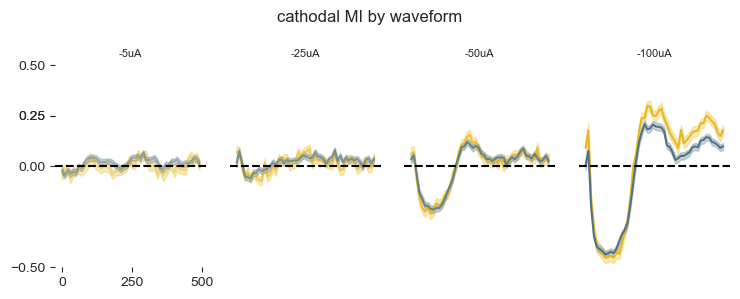

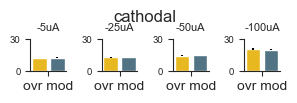

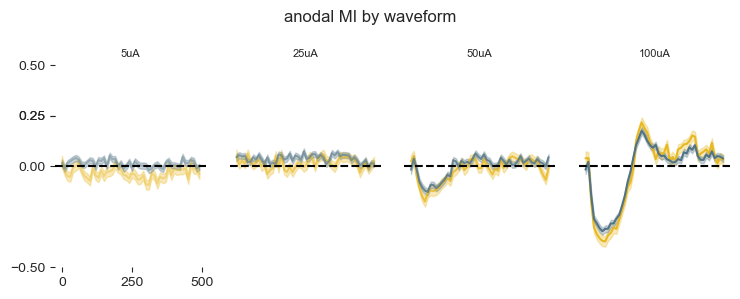

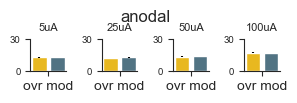

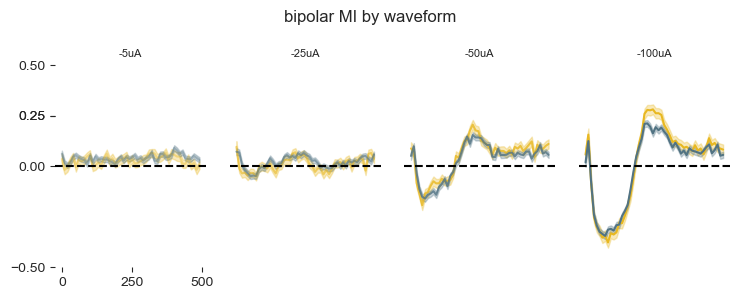

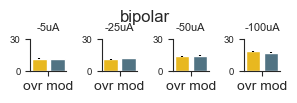

In [ ]:
fs_color = '#E8B820'
rs_color = '#517383'

pol = 'cathodal'

for pol in ['cathodal', 'anodal', 'bipolar']:
    fig, axes = plt.subplots(1, 4, figsize=(7.5, 3))
    fig_bar, axes_bar = plt.subplots(1,4, figsize = (3,1))
    unique_waveform = good_units['waveform_class'].unique()

    for x, amp in enumerate([-5, -25, -50, -100]):
        ax = axes[x]
        ax_bar = axes_bar[x]
        if pol == 'anodal':
            amp = np.abs(amp)
        for i, waveform in enumerate(unique_waveform):
            if waveform in ['fs', 'rs']:
                df_by_region = good_units[(good_units['waveform_class'] == waveform) & (good_units['sub_cort'] == 'Cortical')]

                if amp == -100 or pol != 'monopolar':
                    df_by_region = df_by_region[df_by_region['recording'] != 'jlh39']
                    mi_df = df_by_region[df_by_region[f'{amp}uA_{pol}'].notna()]
                    mi_values = np.array(mi_df[f'{amp}uA_{pol}'].tolist())

                # Calculate mean and SEM for this brain region
                mi_mean = np.mean(mi_values, axis=0)
                mi_sem = sem(mi_values, axis=0)

                # Plot Mean MI line with SEM error clouds for this brain region
                color = fs_color if waveform == 'fs' else rs_color
                alp = { 100: 1, 50: 0.8, 25: 0.6, 5: 0.4 }[np.abs(amp)]

                ax.plot(times, mi_mean, label=f'{waveform}_{amp}uA', color=color, alpha=alp)
                ax.fill_between(times, mi_mean - mi_sem, mi_mean + mi_sem, color=color, alpha=0.3)

                ## overall modulation plot (second figure) for statistics
                # take the sum of the absolute modulation indicies (total now, by epoch eventually) 
                # median modulation
                aucs = np.trapezoid(np.abs(mi_values), axis = 1)
                mean_auc = np.mean(aucs)
                sem_auc = sem(aucs)

                if waveform == "fs":
                    locs = [0]
                else:
                    locs = [1]
                ax_bar.bar(locs[0], mean_auc, color = color, yerr = sem_auc) 

        ax.axhline(0, color='black', linestyle='--')  # Zero line for reference
           
        ax.set_ylim([-0.5, 0.5])
        if x == 0:
            ax.set_yticks([-0.5, 0.25, 0, 0.25, 0.5])
            ax.set_xticks([0, 250, 500])
        else:
            ax.set_yticks([])
            ax.set_xticks([])
        ax.set_title(f'{amp}uA', fontsize=8)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

        
        #overall modulatation plots
        ax_bar.set_ylim(0, 30)
        ax_bar.set_yticks([0, 30], [0, 30], fontsize = 7)
        ax_bar.set_xticks([0.5],['ovr mod'])
        #ax_bar.set_xticklabels(['early', 'middle', 'late'], fontsize=6, rotation=45)
        ax_bar.set_title(f'{amp}uA', fontsize=8)
        ax_bar.spines['top'].set_visible(False)
        ax_bar.spines['right'].set_visible(False)
    
    
    fig.suptitle(f'{pol} MI by waveform')
    fig.tight_layout()

    fig_bar.tight_layout()
    fig_bar.suptitle(pol)
    #fig.savefig(rf"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\MI_fsrs_{pol}_10msbins.pdf")
    #fig.savefig(rf"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\MI_fsrs_{pol}_10msbins.png")
    #fig_bar.savefig(rf"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\MI_fsrs_{pol}_ovrmod_10msbins.pdf")
    #fig_bar.savefig(rf"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\MI_fsrs_{pol}_ovrmod_10msbins.png")

In [391]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy.stats import ttest_ind

results = []

pol_list = ['cathodal', 'anodal', 'bipolar']
levels = [5, 25, 50, 100]

for pol in pol_list:
    for lvl in levels:
        # signed amplitude: anodal positive, cathodal/bipolar negative
        col_amp =  lvl if pol == 'anodal' else -lvl
        amp_signed = float(col_amp)

        for waveform in ['fs', 'rs']:
            df_by_region = good_units[
                (good_units['waveform_class'] == waveform) &
                (good_units['sub_cort'] == 'Cortical')
            ]

            col = f'{col_amp}uA_{pol}'
            if col not in df_by_region.columns:
                continue

            mi_df = df_by_region[df_by_region[col].notna()]
            if mi_df.empty:
                continue

            mi_values = np.array(mi_df[col].tolist())
            if mi_values.ndim != 2 or mi_values.size == 0:
                continue

            aucs = np.trapezoid(np.abs(mi_values), axis=1)

            for a in aucs:
                results.append({
                    'Amplitude': amp_signed,
                    'Polarity': pol,
                    'Waveform': waveform,
                    'AUC': a
                })

stats_df = pd.DataFrame(results)
if stats_df.empty:
    raise ValueError("No AUC data assembled; check dataframe / filters.")

# cast factors
stats_df['Polarity'] = stats_df['Polarity'].astype('category')
stats_df['Waveform'] = stats_df['Waveform'].astype('category')

# --- Multivariate ANOVA (Amplitude continuous × Polarity × Waveform) ---
model = smf.ols('AUC ~ Amplitude * C(Polarity) * C(Waveform)', data=stats_df).fit()
anova_table = anova_lm(model, typ=2)
print("\n=== Multivariate ANOVA: AUC ~ Amplitude * Polarity * Waveform ===")
print(anova_table)

# --- Post hoc: FS vs RS at each amplitude (Cathodal only) ---
print("\n=== Post hoc: FS vs RS at each amplitude (Cathodal only) ===")
df_cath = stats_df[stats_df['Polarity'] == 'cathodal']

for amp in sorted(df_cath['Amplitude'].unique()):
    df_amp = df_cath[df_cath['Amplitude'] == amp]
    fs_vals = df_amp[df_amp['Waveform'] == 'fs']['AUC']
    rs_vals = df_amp[df_amp['Waveform'] == 'rs']['AUC']

    if len(fs_vals) > 1 and len(rs_vals) > 1:
        t, p = ttest_ind(fs_vals, rs_vals, equal_var=False)  # Welch’s
        print(f"Amp {amp} µA: t={t:.3f}, p={p:.4f}, "
              f"mean(fs)={fs_vals.mean():.2f}, mean(rs)={rs_vals.mean():.2f}")
    else:
        print(f"Amp {amp} µA: insufficient data for both groups")



=== Multivariate ANOVA: AUC ~ Amplitude * Polarity * Waveform ===
                                         sum_sq       df           F  \
C(Polarity)                        1.552259e+04      2.0   96.053588   
C(Waveform)                        7.368654e+01      1.0    0.911943   
C(Polarity):C(Waveform)            5.272960e+01      2.0    0.326290   
Amplitude                          3.016818e+04      1.0  373.360541   
Amplitude:C(Polarity)              6.542907e+04      2.0  404.874197   
Amplitude:C(Waveform)              1.950129e+02      1.0    2.413474   
Amplitude:C(Polarity):C(Waveform)  2.620761e+02      2.0    1.621723   
Residual                           1.290242e+06  15968.0         NaN   

                                          PR(>F)  
C(Polarity)                         3.415050e-42  
C(Waveform)                         3.396140e-01  
C(Polarity):C(Waveform)             7.216007e-01  
Amplitude                           3.011835e-82  
Amplitude:C(Polarity)        

In [352]:
recording_map = {'jlh31': jlh31, 'jlh32': jlh32, 'jlh33': jlh33, 'jlh34': jlh34, 
                 'jlh39': jlh39, 'jlh40': jlh40, 'jlh48': jlh48, 'jlh49v1': jlh49, 'jlh53concat': jlh53}
distances_from_stim = []
for i, unit in good_units.iterrows():
    coord = unit.ccf_coordinates 
    r = recording_map[unit.recording] 
    stim_coord = r.trials.contact_negative_coords.values[0]
    dist = np.linalg.norm(coord - stim_coord)
    distances_from_stim.append(dist)

good_units['distance_from_stim'] = distances_from_stim

HVA_units = good_units[
    good_units['brain_reg'].str.contains('layer', case=False, na=False) &
    ~good_units['brain_reg'].str.contains('primary', case=False, na=False)
]
V1_units = good_units[
    good_units['brain_reg'].str.contains('primary', case=False, na=False)] 

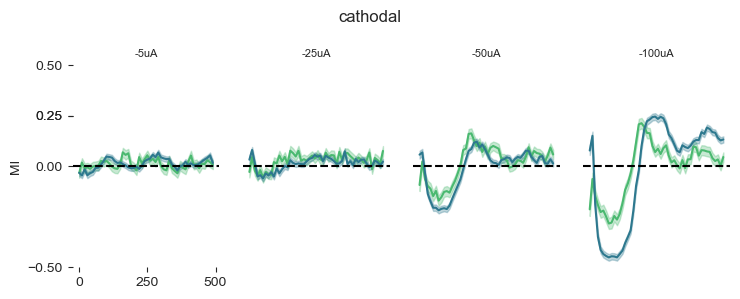

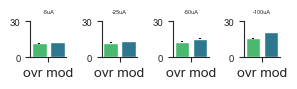

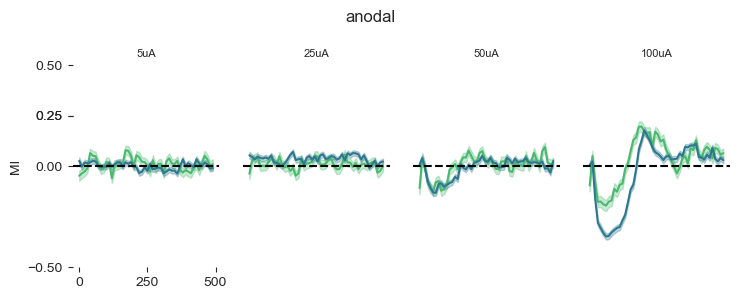

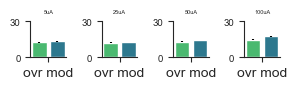

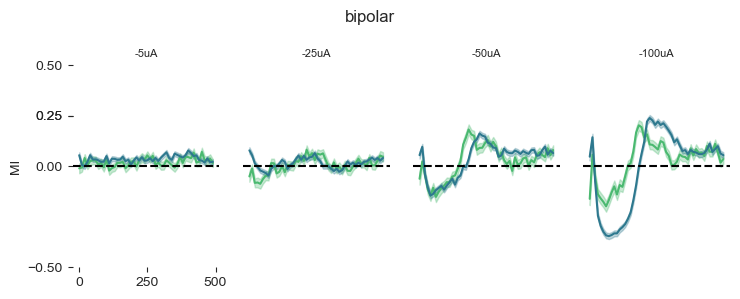

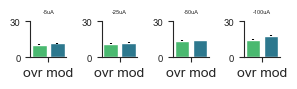

In [365]:
HVA_color = '#4AB970' 
V1_color = '#2D788E'
for pol in ['cathodal', 'anodal', 'bipolar']:
    fig, axes = plt.subplots(1, 4, figsize = (7.5, 3))
    fig_bar, axes_bar = plt.subplots(1,4, figsize = (3,1))
    for x, amp in enumerate([-5, -25, -50, -100]):
        if pol == 'anodal':
            amp = np.abs(amp)
        ax  = axes[x]
        ax_bar = axes_bar[x]
        for label, df_by_region in zip(['HVA', 'V1'], [HVA_units, V1_units]):
            if amp == -100 or pol != 'monopolar':
                df_by_region = df_by_region[df_by_region['recording'] != 'jlh39']
            
            mi_df = df_by_region[df_by_region[f'{amp}uA_{pol}'].notna()]
            mi_values = np.array(mi_df[f'{amp}uA_{pol}'].tolist())
            # calculate mean and SEM for this brain region
            mi_mean = np.mean(mi_values, axis=0)
            mi_sem = sem(mi_values, axis=0)

            # Plot Mean MI line with SEM error clouds for this brain region
            if label == 'HVA':
                color = HVA_color
                locs = [0]
            else:
                color = V1_color
                locs = [1]
            ax.plot(times, mi_mean, label=f'{region}_{amp}uA', color=color, alpha=1)
            ax.fill_between(times, mi_mean - mi_sem, mi_mean + mi_sem, color=color, alpha=0.3)

            
            ## overall modulation plot (second figure) for statistics
            # take the sum of the absolute modulation indicies (total now, by epoch eventually) 
            # median modulation
            aucs = np.trapezoid(np.abs(mi_values), axis = 1)
            mean_auc = np.mean(aucs)
            sem_auc = sem(aucs)
            ax_bar.bar(locs[0], mean_auc, color = color, yerr = sem_auc) 

        ax.axhline(0, color='black', linestyle='--')  # Zero line for reference
           
        ax.set_ylim([-0.5, 0.5])
        if x == 0:
            ax.set_yticks([-0.5, 0.25, 0, 0.25, 0.5])
            ax.set_xticks([0, 250, 500])
        else:
            ax.set_yticks([])
            ax.set_xticks([])
        ax.set_title(f'{amp}uA', fontsize=8)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        
        #overall modulatation plots
        ax_bar.set_ylim(0, 30)
        ax_bar.set_yticks([0, 30], [0, 30], fontsize = 7)
        ax_bar.set_xticks([0.5],['ovr mod'])
        #ax_bar.set_xticklabels(['early', 'middle', 'late'], fontsize=6, rotation=45)
        ax_bar.set_title(f'{amp}uA', fontsize=4)
        ax_bar.spines['top'].set_visible(False)
        ax_bar.spines['right'].set_visible(False)
    axes[0].set_ylabel('MI', fontsize=10)
    
    fig.suptitle(pol)
    fig.tight_layout()
    
    fig_bar.tight_layout()
    
    #fig.savefig(rf"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\MI_{pol}_HVA_V1_10msbin.pdf")
    #fig.savefig(rf"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\MI_{pol}_HVA_V1_10msbin.png")
    #fig_bar.savefig(rf"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\MI_{pol}_ovrmod_HVA_V1_10msbin.pdf")
    #fig_bar.savefig(rf"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\MI_{pol}_ovrmod_HVA_V1_10msbin.png")

In [404]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

results = []

pol_list = ['cathodal', 'anodal', 'bipolar']
levels = [5, 25, 50, 100]

for pol in pol_list:
    for lvl in levels:
        # signed amplitude for column lookup and the model
        col_amp =  lvl if pol == 'anodal' else -lvl
        amp_signed = float(col_amp)

        # region sources: V1 & HVA from your split DFs; Subcortical from good_units
        region_sources = [
            ('V1', V1_units),
            ('HVA', HVA_units),
            ('Subcortical', good_units[good_units['sub_cort'] == 'Subcortical'])
        ]

        for label, df_region in region_sources:
            # keep your exclusion rule exactly as you had it
            if (col_amp == -100) or (pol != 'monopolar'):
                df_region = df_region[df_region['recording'] != 'jlh39']

            col = f'{col_amp}uA_{pol}'
            if col not in df_region.columns:
                continue

            mi_df = df_region[df_region[col].notna()]
            if mi_df.empty:
                continue

            mi_values = np.array(mi_df[col].tolist())
            if mi_values.ndim != 2 or mi_values.size == 0:
                continue

            # area under |MI|; if bins aren't unit-spaced, pass x=times
            aucs = np.trapezoid(np.abs(mi_values), axis=1)

            for a in aucs:
                results.append({
                    'Amplitude': amp_signed,   # continuous, signed
                    'Polarity': pol,           # categorical
                    'Region': label,           # 'V1' | 'HVA' | 'Subcortical'
                    'AUC': a
                })

# assemble stats df
stats_df = pd.DataFrame(results)
if stats_df.empty:
    raise ValueError("No AUC data assembled; check column names/filters.")

stats_df['Polarity'] = stats_df['Polarity'].astype('category')
stats_df['Region']   = stats_df['Region'].astype('category')

# --- ANOVA: Amplitude (continuous) × Polarity × Region(3) ---
model = smf.ols('AUC ~ Amplitude * C(Polarity) * C(Region)', data=stats_df).fit()
anova_table = anova_lm(model, typ=2)
print("\n=== ANOVA: AUC ~ Amplitude * Polarity * Region ===")
print(anova_table)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# --- Post hoc: Region comparisons within Cathodal at each amplitude level (Tukey HSD) ---
print("\n=== Post hoc (Cathodal only): Region comparisons within each amplitude (Tukey HSD) ===")
df_cath = stats_df[stats_df['Polarity'] == 'cathodal']

for amp in sorted(df_cath['Amplitude'].unique()):
    df_amp = df_cath[df_cath['Amplitude'] == amp]
    if df_amp['Region'].nunique() < 2 or len(df_amp) < 3:
        print(f"Amp {amp} µA: insufficient data for Tukey (need at least 2 groups, n>=3).")
        continue

    # --- means and stds ---
    print(f"\nAmplitude {amp} µA:")
    for region, vals in df_amp.groupby('Region')['AUC']:
        mean_val = vals.mean()
        std_val  = vals.std()
        n_val    = len(vals)
        print(f"  {region}: mean={mean_val:.3f}, std={std_val:.3f}, n={n_val}")

    # --- Tukey HSD ---
    tuk = pairwise_tukeyhsd(endog=df_amp['AUC'], groups=df_amp['Region'])
    print(tuk.summary())



=== ANOVA: AUC ~ Amplitude * Polarity * Region ===
                                       sum_sq       df           F  \
C(Polarity)                      1.784864e+04      2.0  117.238610   
C(Region)                        1.873787e+04      2.0  123.079479   
C(Polarity):C(Region)            3.334453e+03      4.0   10.951162   
Amplitude                        2.438097e+04      1.0  320.292339   
Amplitude:C(Polarity)            5.257108e+04      2.0  345.312632   
Amplitude:C(Region)              3.568959e+03      2.0   23.442669   
Amplitude:C(Polarity):C(Region)  1.377644e+04      4.0   45.245206   
Residual                         1.673596e+06  21986.0         NaN   

                                        PR(>F)  
C(Polarity)                       2.256886e-51  
C(Region)                         6.986817e-54  
C(Polarity):C(Region)             7.185511e-09  
Amplitude                         4.000362e-71  
Amplitude:C(Polarity)            2.186900e-148  
Amplitude:C(Region)    

C:\Users\jordan\AppData\Local\Temp\ipykernel_20000\1633129789.py:81: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for region, vals in df_amp.groupby('Region')['AUC']:



Amplitude -50.0 µA:
  HVA: mean=13.034, std=8.828, n=349
  Subcortical: mean=12.079, std=7.525, n=351
  V1: mean=15.403, std=8.682, n=1029
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj  lower  upper  reject
------------------------------------------------------------
        HVA Subcortical  -0.9549 0.297 -2.4605 0.5507  False
        HVA          V1   2.3687   0.0   1.135 3.6025   True
Subcortical          V1   3.3236   0.0  2.0925 4.5548   True
------------------------------------------------------------

Amplitude -25.0 µA:
  HVA: mean=12.198, std=8.848, n=349
  Subcortical: mean=12.603, std=8.003, n=351
  V1: mean=13.490, std=8.265, n=1029
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
        HVA Subcortical   0.4054 0.7961 -1.0725 1.8832  False
        HVA          V1   1.2924 0.0332  0.08

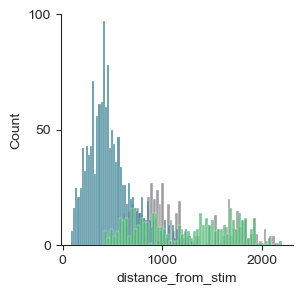

In [363]:
sub_cort_units = good_units[
    good_units['sub_cort'] == 'Subcortical'
]

fig, ax = plt.subplots(figsize=(3, 3))
sns.histplot(sub_cort_units['distance_from_stim'], bins=60, color='gray', label='Subcortical', ax = ax)
sns.histplot(V1_units['distance_from_stim'], bins=60, color=V1_color, label='Primary Visual Area', ax = ax)
sns.histplot(HVA_units['distance_from_stim'], bins=60, color=HVA_color, label='Higher Visual Area', ax = ax)
ax.set_ylim(0, 100)
ax.set_yticks([0,  50, 100])
ax.set_xticks([0, 1000, 2000])
#ax.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.savefig(r"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\distance_from_stim_histogram_HVA_cort.pdf")
#plt.savefig(r"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\distance_from_stim_histogram_HVA_cort.png")


In [399]:
from scipy.stats import kruskal

sc = sub_cort_units['distance_from_stim'].dropna()
v1 = V1_units['distance_from_stim'].dropna()
hva = HVA_units['distance_from_stim'].dropna()

print("Kruskal–Wallis across 3 groups:", kruskal(sc, v1, hva))

from scipy.stats import mannwhitneyu

print("Mann–Whitney Subcortical vs V1:", mannwhitneyu(sc, v1, alternative='two-sided'))
print("Mann–Whitney Subcortical vs HVA:", mannwhitneyu(sc, hva, alternative='two-sided'))
print("Mann–Whitney V1 vs HVA:", mannwhitneyu(v1, hva, alternative='two-sided'))


Kruskal–Wallis across 3 groups: KruskalResult(statistic=np.float64(1250.3641777846944), pvalue=np.float64(3.068093632273229e-272))
Mann–Whitney Subcortical vs V1: MannwhitneyuResult(statistic=np.float64(670658.0), pvalue=np.float64(1.3114889346706367e-186))
Mann–Whitney Subcortical vs HVA: MannwhitneyuResult(statistic=np.float64(104115.5), pvalue=np.float64(0.5111853364534158))
Mann–Whitney V1 vs HVA: MannwhitneyuResult(statistic=np.float64(47781.5), pvalue=np.float64(3.116293075268703e-155))


## dimensionality

# Overview

The overaraching goal of this analysis is to quantify how the **dimensionality of neural responses evolves over time** in response to electrical stimulation. By doing so, you can assess whether the neural population engages a low-dimensional subspace at specific moments (e.g., during stimulation) or if its activity remains high-dimensional. The hypothesis is that the dimensionality starts high (early direct response within 10 or so ms) and collapses dramatically given highly synchronous response. 

---

# Goals

- **Time-Resolved Analysis:**  
  Compute dimensionality metrics within short time bins (e.g., 5-10 ms) to capture rapid changes in neural activity.

- **Effective vs. Noiseless Dimensionality:**  
  - *Noiseless:* Analyze trial-averaged responses to reveal the underlying, low-dimensional structure.
  - *Noisy:* Use trial-level data to capture the inherent variability, even though this may lead to an inflated dimensionality estimate.

---

# Methodology

The method leverages **Principal Component Analysis (PCA)** to extract dominant patterns from the data and then quantifies dimensionality using two main approaches:

## 1. Effective Dimensionality via PCA Thresholding

- **Process:**
  - For each time bin, arrange the neural data into a matrix with rows corresponding to individual trials and columns to neurons.
  - Perform PCA to obtain an ordered list of eigenvalues representing the variance explained by each principal component.
  - Determine the number of components needed to capture a predefined fraction of the total variance (e.g., 95%).

- **Mathematical Formulation:**
  If the eigenvalues (or variance explained) are \(\lambda_1, \lambda_2, \dots, \lambda_N\), then the effective dimensionality \(d_{\text{eff}}\) is the smallest integer \(d\) such that:
  
  $$
  \sum_{i=1}^{d} \lambda_i \geq 0.95 \times \sum_{i=1}^{N} \lambda_i
  $$

---

## 2. Participation Ratio as a Continuous Metric

- **Process:**
  - Compute the covariance matrix of the neural responses in each time bin.
  - Obtain the eigenvalues of this covariance matrix.
  - Calculate the participation ratio, which provides a continuous estimate of how many dimensions significantly contribute to the data's variability.

- **Key Decision:**
  - Use the participation ratio to avoid setting a hard threshold, especially when the eigenvalue spectrum decays gradually.

- **Mathematical Formulation:**
  
  $$
  D_{\mathrm{PR}} = \frac{\left(\sum_{i} \lambda_i\right)^2}{\sum_{i} \lambda_i^2}
  $$
  
  Here, \(\lambda_i\) are the eigenvalues from the covariance matrix. A low \(D_{\mathrm{PR}}\) implies that only a few components dominate, while a higher value suggests a more distributed contribution across many components.


In [64]:
from sklearn.decomposition import PCA

def pca_explained_dim(data_bin, var_threshold=0.95):
    """
    Compute the effective dimensionality as the minimum number of PCA components 
    required to explain a given fraction of the variance.

    Arguments:
      data_bin: 2D np.array of shape (n_trials, n_neurons) for a single time bin.
      var_threshold: float, e.g. 0.95 for 95% of variance.
    
    Returns:
      d_eff: int, the effective dimensionality for that time bin.
    """
    pca = PCA()
    pca.fit(data_bin)
    cum_var = np.cumsum(pca.explained_variance_ratio_)
    d_eff = np.searchsorted(cum_var, var_threshold) + 1  # +1 because indices start at 0
    return d_eff

def participation_ratio(data_bin):
    """
    Compute the participation ratio of the eigenvalue spectrum of the covariance 
    matrix as a continuous measure of dimensionality.
    
    Arguments:
      data_bin: 2D np.array of shape (n_trials, n_neurons).
    
    Returns:
      D_PR: float, the participation ratio.
    """
    # Compute covariance matrix (trials x trials variability)
    cov_mat = np.cov(data_bin, rowvar=False)  # shape (n_neurons, n_neurons)
    eigenvalues = np.linalg.eigvalsh(cov_mat)  # sorted ascending; use eigvalsh for symmetric matrix
    # Remove negative values (numerical issues) and use only positive parts
    eigenvalues = np.maximum(eigenvalues, 0)
    numerator = np.sum(eigenvalues)**2
    denominator = np.sum(eigenvalues**2) if np.sum(eigenvalues**2) > 0 else np.inf
    D_PR = numerator / denominator
    return D_PR


def dimensionality_over_time(data, var_threshold=0.95):
    """
    Compute a time series of effective dimensionality measures for binned neural data.
    
    Arguments:
      data: 3D np.array with shape (n_trials, n_neurons, n_time_bins)
      var_threshold: float, variance threshold for effective dimension.
      
    Returns:
      d_eff_list: list of effective dimensions (explained variance threshold) per bin.
      d_pr_list: list of participation ratios per bin.
    """
    n_time_bins = data.shape[2]
    d_eff_list = []
    d_pr_list  = []
    
    for t in range(n_time_bins):
        data_bin = data[:, :, t]  # data for time bin t
        d_eff = pca_explained_dim(data_bin, var_threshold)
        d_pr  = participation_ratio(data_bin)
        d_eff_list.append(d_eff)
        d_pr_list.append(d_pr)
    
    return d_eff_list, d_pr_list


In [179]:
bins = np.arange(-pre, post, bin_size)

In [182]:
-0

0

In [196]:
from collections import defaultdict
bin_size = 0.010
pre = 0.250
post = 0.500
window = pre + post

times = np.arange(-pre, post, bin_size) * 1000  # Convert to milliseconds
n_bins = len(times)

data_dict = defaultdict(lambda: defaultdict(dict))
polarities = ['bipolar', 'monopolar']
amps = [-5, -25, -50, -100]

for r in recordings:
    for amp in amps:
        for polarity in polarities:
            stim_times = choose_stim_parameter(r.trials, amp=amp, polarity=polarity)
            if len(stim_times) == 0:
                continue

            stim_times = stim_times[:75]
            u = r.units[(r.units['group'] == 'good') & (~r.units['slope_outlier'])]
            u = u[u['brain_reg'].str.contains('layer', case=False, na=False)].reset_index(drop=True)
            
            n_trials = len(stim_times)
            n_neurons = len(u)
            data = np.zeros((n_trials, n_neurons, n_bins))    
            
            for i, unit in u.iterrows():
                psth_, var_, bytrial_ = psth(unit.spike_times, stim_times, pre = -pre, post = post, bin_size = bin_size, var = 'sem', plot = False)
                bytrial_ = np.vstack(bytrial_)
                data[:, i, :] = bytrial_
            
            d_eff_list, d_pr_list = dimensionality_over_time(data, var_threshold=0.95)

            data_dict[amp][polarity][r.mouse] = {
                'data': data,
                'time': times,
                'units': u,
                'd_eff': d_eff_list,
                'pr': d_pr_list
            }


These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [ 5 15  2]
Returning the first one: 5
These are the multiple unique cathodal [ 5 15  2]
Returning the first one: 5
These are the multiple unique cathodal [ 5 15  2]
Returning the first one: 5
These are the multiple unique cathodal [15 11]
Returning the first one: 15
These are the multiple unique cathodal [15 11]
Returning the first one: 15
These are the multiple unique cathodal [15 11]
Returning the first one: 15
These are the multiple unique cathodal [15 11]
Returning the first one: 15
These are the multiple unique cathodal [16  7  4]
Returning the first one: 16
These are the multiple unique cathodal [16  4]
Returning the first one: 16
These are the multiple unique cathodal [16  4]
Returning the first one: 16
These are the mu

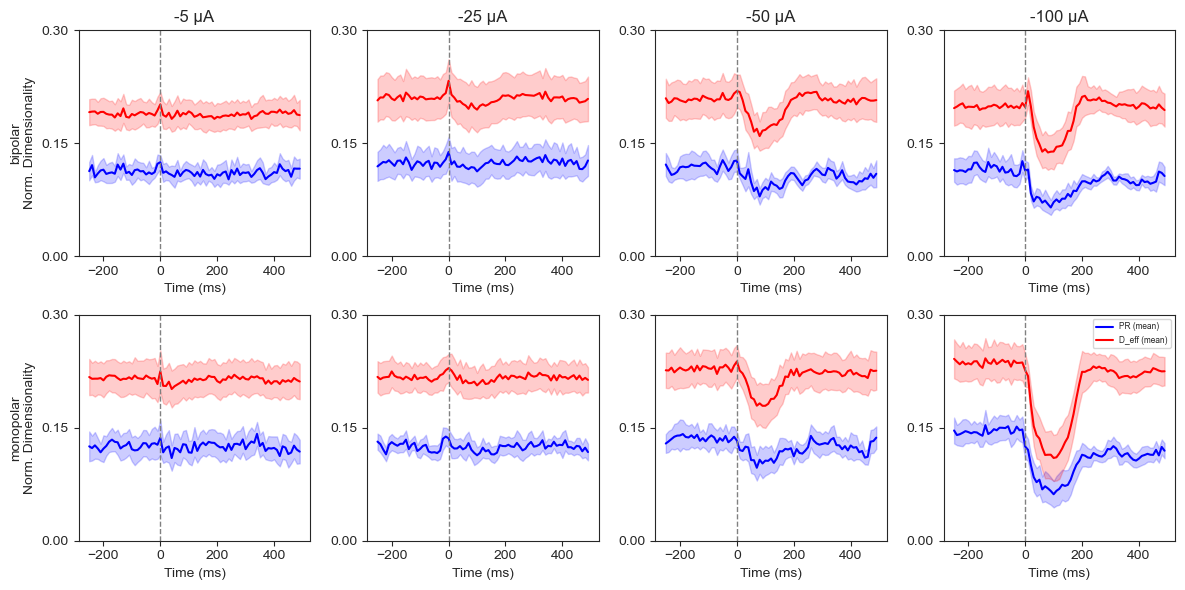

In [197]:
from matplotlib.gridspec import GridSpec

def plot_mean_sem_overlay_normalized(data_dict, time):
    fig = plt.figure(figsize=(12, 6))
    gs = GridSpec(2, 4, figure=fig)

    for row, polarity in enumerate(polarities):
        for col, amp in enumerate(amps):
            ax = fig.add_subplot(gs[row, col])
            all_pr = []
            all_deff = []

            for mouse, d in data_dict[amp][polarity].items():
                n_neurons = d['data'].shape[1]
                pr_norm = np.array(d['pr']) / n_neurons
                deff_norm = np.array(d['d_eff']) / n_neurons

                #ax.plot(time * 1000, pr_norm, color='gray', alpha=0.3, linewidth=0.75)
                all_pr.append(pr_norm)
                all_deff.append(deff_norm)

            pr_mean = np.mean(all_pr, axis=0)
            pr_sem = np.std(all_pr, axis=0) / np.sqrt(len(all_pr))

            deff_mean = np.mean(all_deff, axis=0)
            deff_sem = np.std(all_deff, axis=0) / np.sqrt(len(all_deff))

            ax.plot(time, pr_mean, label='PR (mean)', color='blue')
            ax.fill_between(time, pr_mean - pr_sem, pr_mean + pr_sem, color='blue', alpha=0.2)

            ax.plot(time, deff_mean, label='D_eff (mean)', color='red')
            ax.fill_between(time, deff_mean - deff_sem, deff_mean + deff_sem, color='red', alpha=0.2)

            if row == 0:
                ax.set_title(f"{amp} µA")

            if col == 0:
                ax.set_ylabel(f"{polarity}\nNorm. Dimensionality")

            ax.set_xlabel('Time (ms)')
            ax.set_ylim(0, 0.3)
            ax.set_yticks([0.0, 0.15, 0.3])
            if row == 1 and col == 3:
                ax.legend(loc='upper right', fontsize=6)
            ax.axvline(0, color='gray', linestyle='--', linewidth=1)

    fig.tight_layout()
    return fig

fig_overlay_norm = plot_mean_sem_overlay_normalized(data_dict, times)

save_path = os.path.join(os.getcwd(), 'dimensionality')
os.makedirs(save_path, exist_ok=True)

#fig_overlay_norm.savefig(os.path.join(save_path,'pr_d_eff_byamp.png'))
#fig_overlay_norm.savefig(os.path.join(save_path,'pr_d_eff_byamp.pdf'))

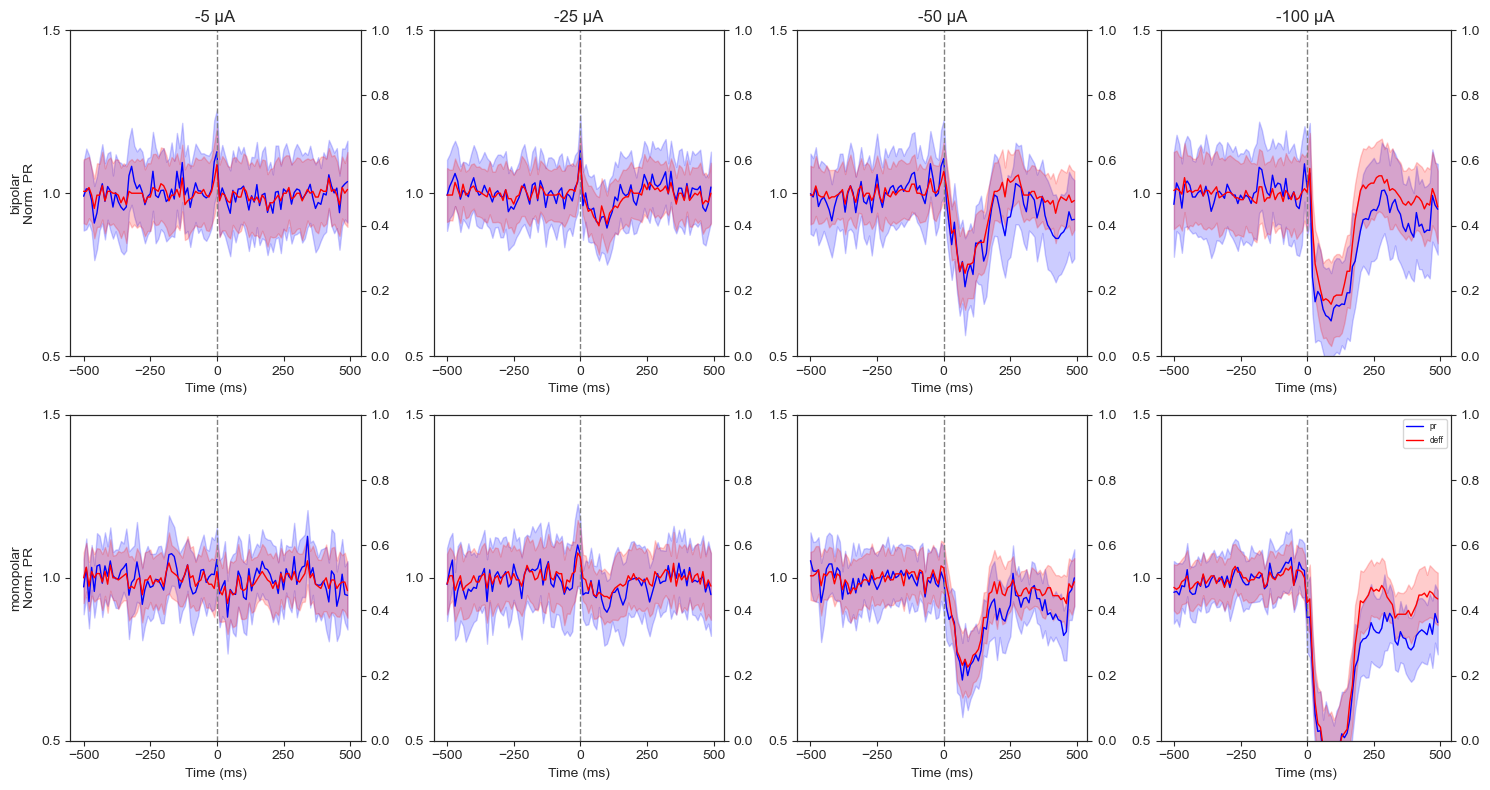

In [191]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

for row, polarity in enumerate(polarities):
    for col, amp in enumerate(amps):
        ax1 = axes[row, col]
        all_fr = []
        all_pr = []
        all_deff = []
        for mouse, d in data_dict[amp][polarity].items():
            n_neurons = d['data'].shape[1]

            mean_fr = d['data'].mean(axis=(0, 1))
            pr_norm = np.array(d['pr']) #/ n_neurons
            deff_norm = np.array(d['d_eff']) #/ n_neurons
            all_fr.append(mean_fr)
            all_pr.append(pr_norm)
            all_deff.append(deff_norm)

        if len(all_fr) == 0:
            continue

        fr_mean = np.mean(all_fr, axis=0)
        fr_sem = np.std(all_fr, axis=0) / np.sqrt(len(all_fr))
        
        pr_mean = np.mean(all_pr, axis=0)
        pr_sem = np.std(all_pr, axis=0) / np.sqrt(len(all_pr))

        deff_mean = np.mean(all_deff, axis = 0)
        deff_sem = np.std(all_deff, axis=0) / np.sqrt(len(all_deff))
        
        # Normalize to baseline (mean of pre-stimulus period)
        baseline_mask = times < 0
        pr_baseline = np.median(pr_mean[baseline_mask])#.mean()
        fr_baseline = np.median(fr_mean[baseline_mask])#.mean()
        deff_baseline = np.median(deff_mean[baseline_mask])
        
        pr_mean_norm = pr_mean / pr_baseline
        fr_mean_norm = fr_mean / fr_baseline
        pr_sem_norm = pr_sem / pr_baseline
        fr_sem_norm = fr_sem / fr_baseline
        
        deff_mean_norm = deff_mean / deff_baseline 
        deff_sem_norm = deff_sem / deff_baseline
        
        # Plot PR (left axis)
        
        dimen = 'pr'
        if dimen == 'deff': 
            dimen_mean = deff_mean_norm
            dimen_sem = deff_sem_norm
        else:
            dimen_mean = pr_mean_norm        
            dimen_sem = pr_sem_norm
        
        ax1.plot(times, dimen_mean, color='blue', lw = 1, label=dimen)
        ax1.fill_between(times,
                            dimen_mean - dimen_sem,
                            dimen_mean + dimen_sem,
                            color='blue', alpha=0.2)
        ax1.axvline(0, color='gray', linestyle='--', linewidth=1)

        if col == 0:
            ax1.set_ylabel(f"{polarity}\nNorm. PR")

        
        ax1.plot(times, deff_mean_norm, color='red', lw = 1, label='deff')
        ax1.fill_between(times,
                            deff_mean_norm - deff_sem_norm,
                            deff_mean_norm + deff_sem_norm,
                            color='red', alpha=0.2)
        
        ax1.set_ylim(0.5, 1.5)
        ax1.set_yticks([0.5, 1, 1.5])
        ax1.set_xticks([-500, -250, 0, 250, 500])
        
        #ax1.axvline(0, color='gray', linestyle='--', linewidth=1)
        ax1.set_xlabel("Time (ms)")

        # Plot FR (right axis)
        ax2 = ax1.twinx()
        # ax2.plot(times, fr_mean_norm, color='black', lw = 0.5, label='FR (norm)')
        # ax2.fill_between(times,
        #                     fr_mean_norm - fr_sem_norm,
        #                     fr_mean_norm + fr_sem_norm,
        #                     color='black', alpha=0.2)
        # ax2.set_ylim(-2, 4)
        # ax2.set_yticks([0, 1, 2])
        # ax2.tick_params(axis='y', labelsize=6)

        if row == 0:
            ax1.set_title(f"{amp} µA")

        if row == 1 and col == 3:
            lines1, labels1 = ax1.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=6)

plt.tight_layout()
#plt.savefig(r"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\dimensionality.pdf")
#plt.savefig(r"C:\Users\jordan\Documents\combined_figs\single_unit\circuit\dimensionality.png")

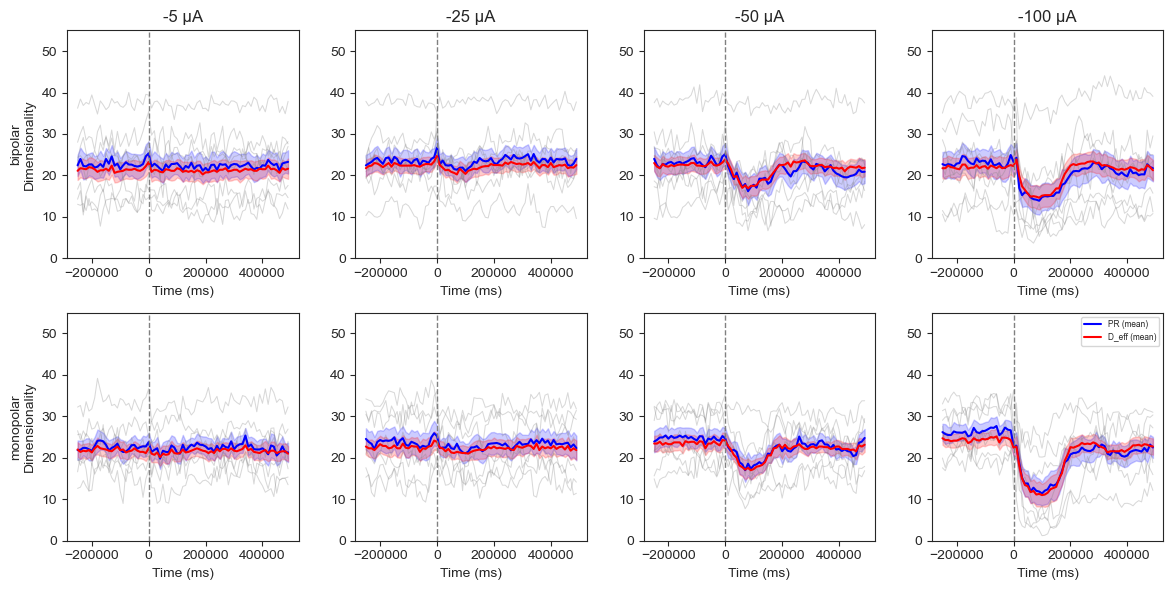

In [169]:
from matplotlib.gridspec import GridSpec

def plot_mean_sem_overlay(data_dict, time):
    fig = plt.figure(figsize=(12, 6))
    gs = GridSpec(2, 4, figure=fig)

    for row, polarity in enumerate(polarities):
        for col, amp in enumerate(amps):
            ax = fig.add_subplot(gs[row, col])
            all_pr = []
            all_deff = []

            for mouse, d in data_dict[amp][polarity].items():
                ax.plot(time * 1000, d['pr'], color='gray', alpha=0.3, linewidth=0.75)
                all_pr.append(d['pr'])
                all_deff.append(d['d_eff'])

            pr_mean = np.mean(all_pr, axis=0)
            pr_sem = np.std(all_pr, axis=0) / np.sqrt(len(all_pr))

            deff_mean = np.mean(all_deff, axis=0)
            deff_sem = np.std(all_deff, axis=0) / np.sqrt(len(all_deff))

            ax.plot(time * 1000, pr_mean, label='PR (mean)', color='blue')
            ax.fill_between(time * 1000, pr_mean - pr_sem, pr_mean + pr_sem, color='blue', alpha=0.2)

            ax.plot(time * 1000, deff_mean, label='D_eff (mean)', color='red')
            ax.fill_between(time * 1000, deff_mean - deff_sem, deff_mean + deff_sem, color='red', alpha=0.2)

            if row == 0:
                ax.set_title(f"{amp} µA")

            if col == 0:
                ax.set_ylabel(f"{polarity}\nDimensionality")

            ax.set_xlabel('Time (ms)')
            ax.set_ylim(0, 55)
            if row == 1 and col == 3:
                ax.legend(loc='upper right', fontsize=6)
            ax.axvline(0, color='gray', linestyle='--', linewidth=1)
    fig.tight_layout()
    return fig

fig_overlay = plot_mean_sem_overlay(data_dict, times)

In [98]:
int(pre/bin_size)

100

In [100]:
pre_base = int(pre/bin_size)
baseline = pr_mean_norm[0:pre_base]

early = pr_mean_norm[pre_base:pre_base+5] # 10 ms considering 2 ms bins 
middle = pr_mean_norm[pre_base+6:pre_base+75]
late = pr_mean_norm[pre_base+85:pre_base+150]

print(np.mean(baseline))
print(np.mean(early))
print(np.mean(middle))
print(np.mean(late))


0.9888649158959378
0.6430928533050991
0.4110571007876438
0.9550256858608992


In [97]:
deff_mean_norm.shape

(350,)

## Fourier analyses

In [82]:
def col_to_list(df, col):
    # drops nan rows, converts each cell (which is itself an array) into a list element
    return df[col].dropna().tolist()

cortical_units = good_units[good_units['sub_cort'] == 'Cortical']

c5_traces   = col_to_list(cortical_units, '-5uA_cathodal')
c25_traces  = col_to_list(cortical_units, '-25uA_cathodal')
c50_traces  = col_to_list(cortical_units, '-50uA_cathodal')
c100_traces = col_to_list(cortical_units, '-100uA_cathodal')

def mean_trace(traces):
    mat = np.vstack(traces)          # shape (n_units, n_bins); assumes equal length
    return mat.mean(axis=0)

mi_dict = {
    'c5'  : mean_trace(c5_traces),
    'c25' : mean_trace(c25_traces),
    'c50' : mean_trace(c50_traces),
    'c100': mean_trace(c100_traces)
}


def pad_to_max(traces, pad_val=np.nan):
    L = max(len(t) for t in traces)
    out = np.full((len(traces), L), pad_val)
    for i, t in enumerate(traces):
        out[i, :len(t)] = t
    return out

mi_dict = {k: np.nanmean(pad_to_max(v), axis=0) 
           for k, v in [('c5', c5_traces), ('c25', c25_traces),
                        ('c50', c50_traces), ('c100', c100_traces)]}


In [68]:
import pickle as pkl
path = r"C:\Users\jordan\Documents\estim_paper_repos\intermediates"

with open(os.path.join(path, 'cortical_mi_traces_1s.pkl'), 'wb') as f:
    pkl.dump(mi_dict, f)


In [ ]:
with open(os.path.join(path, 'cortical_mi_traces.pkl'), 'rb') as f:
    mi_dict = pkl.load(f)

In [83]:
from numpy.fft import rfft, rfftfreq
from scipy.signal.windows import hann

bin_w   = 0.002
fs      = 1/bin_w
w       = hann(n_bins)

def avg_fft(traces):
    Fs = np.array([rfft((t - t.mean()) * w) for t in traces])  # complex, shape (n_units, n_freqs)
    return Fs.mean(axis=0)   # complex average
                     
fft_dict = { 'c5':   avg_fft(c5_traces),
             'c25':  avg_fft(c25_traces),
             'c50':  avg_fft(c50_traces),
             'c100': avg_fft(c100_traces) }

freqs = rfftfreq(n_bins, d=bin_w)

In [96]:
dom_f = {}
mag   = {}
phase = {}

for k, F in fft_dict.items():
    mags = np.abs(F)
    mags[0] = 0                       # kill DC

    # ----- pick the peak *above 2 Hz* -----
    valid_idx = np.where(freqs > 2)[0]        # indices where f > 2 Hz
    if valid_idx.size == 0:
        raise ValueError("frequency array has no bins above 2 Hz")

    peak_local = valid_idx[np.argmax(mags[valid_idx])]
    dom_f[k]   = freqs[peak_local]            # Hz
    mag[k]     = mags[peak_local]
    phase[k]   = np.angle(F[peak_local])      # rad

# ---- circular summary (unchanged) ----
p_vec      = np.array(list(phase.values()))
mean_phase = np.arctan2(np.sin(p_vec).mean(), np.cos(p_vec).mean())
R          = np.hypot(np.sin(p_vec).mean(), np.cos(p_vec).mean())

print('per-condition dominant freq (Hz):', dom_f)
print('phase (deg):', {k: np.degrees(v) for k, v in phase.items()})
print('circular mean (deg):', np.degrees(mean_phase), '  R =', R)


per-condition dominant freq (Hz): {'c5': np.float64(3.0), 'c25': np.float64(3.0), 'c50': np.float64(5.0), 'c100': np.float64(4.0)}
phase (deg): {'c5': np.float64(124.37214353416257), 'c25': np.float64(35.655803401080675), 'c50': np.float64(-10.542454428782497), 'c100': np.float64(21.07915559113239)}
circular mean (deg): 36.21830103657361   R = 0.6706271088049018


C:\Users\jordan\AppData\Local\Temp\ipykernel_16632\2237156039.py:53: RuntimeWarning: divide by zero encountered in reciprocal
  one_over_f = ref * (freqs / freqs[band][0])**(-1)


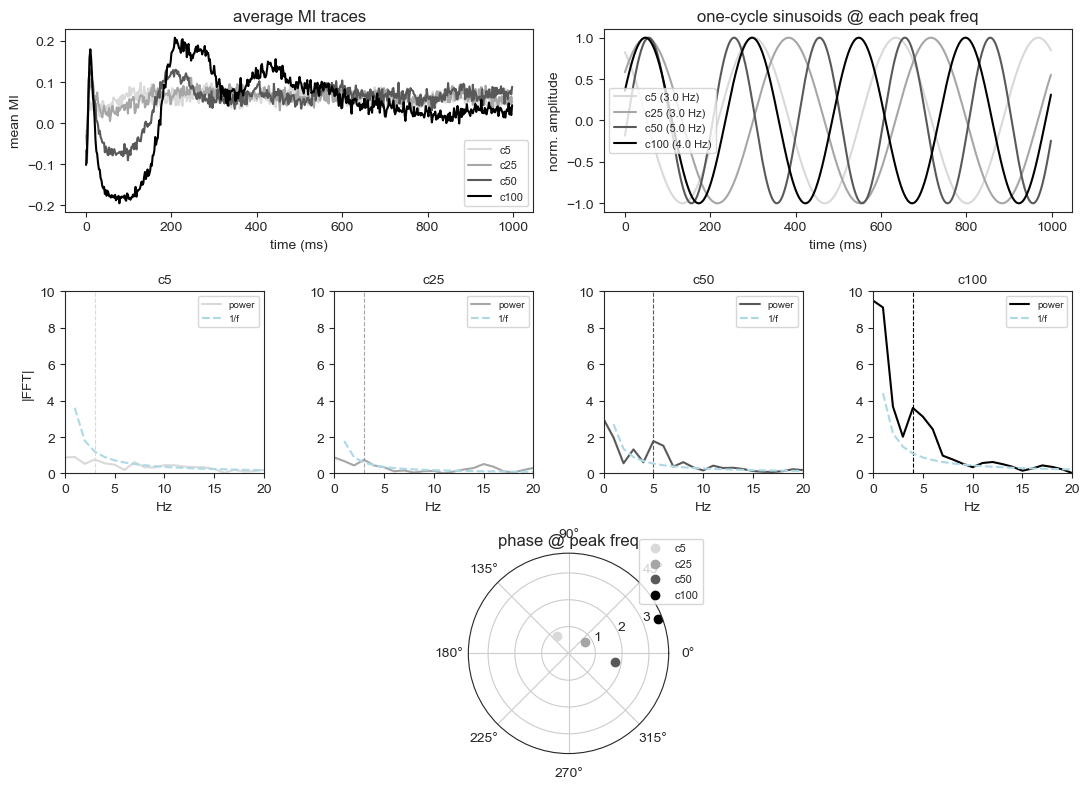

In [98]:
import matplotlib.gridspec as gridspec

mean_traces = mi_dict#{k: mean_trace(v) for k,v in mi_dict.items()}
t  = np.arange(500)*binsize
t_ms = t * 1e3     # ms

# figure & layout 
fig = plt.figure(figsize=(11, 8))
gs  = gridspec.GridSpec(3, 4, height_ratios=[1, 1, 1.1])

# row-0 panels
ax_time   = fig.add_subplot(gs[0, 0:2])
ax_sinus  = fig.add_subplot(gs[0, 2:4])

# row-2 polar (span the middle two columns)
ax_polar  = fig.add_subplot(gs[2, 1:3], projection='polar')

# color ramp (light gray → black)
colors = {'c5':'#d9d9d9', 'c25':'#a6a6a6', 'c50':'#595959', 'c100':'#000000'}

# (A) time-domain MI 
for k in mean_traces:
    ax_time.plot(t_ms, mean_traces[k], color=colors[k], label=k)
ax_time.set_xlabel('time (ms)')
ax_time.set_ylabel('mean MI')
ax_time.set_title('average MI traces')
ax_time.legend(loc='best', fontsize=8)

# (B) one-cycle sinusoids
for k in mean_traces:
    f0  = dom_f[k];   phi = phase[k]
    sin1 = np.sin(2*np.pi*f0*(t_ms/1e3) + phi)
    ax_sinus.plot(t_ms, sin1, color=colors[k], label=f'{k} ({f0:.1f} Hz)')
ax_sinus.set_xlabel('time (ms)')
ax_sinus.set_ylabel('norm. amplitude')
ax_sinus.set_title('one-cycle sinusoids @ each peak freq')
ax_sinus.legend(fontsize=8)

# (C) four spectra per amplitude 
spec_axes = {}
spec_order = ['c5', 'c25', 'c50', 'c100']
for i, k in enumerate(spec_order):
    ax = fig.add_subplot(gs[1, i])
    spec_axes[k] = ax

    pwr = np.abs(fft_dict[k])
    ax.plot(freqs, pwr, color=colors[k], label='power')
    ax.axvline(dom_f[k], color=colors[k], ls='--', lw=0.8)

    # 1/f null (α=1) scaled to median power 5–10 Hz for THIS condition
    band = (freqs >= 10) & (freqs <= 15)
    ref  = np.median(pwr[band])
    one_over_f = ref * (freqs / freqs[band][0])**(-1)
    ax.plot(freqs, one_over_f, color='lightblue', ls='--', label='1/f')

    ax.set_xlim(0, 20)
    ax.set_ylim(0, 10)
    ax.set_title(k, fontsize=10)
    ax.set_xlabel('Hz')
    if i == 0:
        ax.set_ylabel('|FFT|')
    ax.legend(fontsize=7, loc='upper right')

# polar phase 
for k in spec_order:
    ax_polar.scatter(phase[k], mag[k], color=colors[k], label=k)
ax_polar.set_title('phase @ peak freq')
ax_polar.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=8)

plt.tight_layout()

## dimensionality

In [91]:
from sklearn.decomposition import PCA

def pca_explained_dim(data_bin, var_threshold=0.95):
    """
    Compute the effective dimensionality as the minimum number of PCA components 
    required to explain a given fraction of the variance.

    Arguments:
      data_bin: 2D np.array of shape (n_trials, n_neurons) for a single time bin.
      var_threshold: float, e.g. 0.95 for 95% of variance.
    
    Returns:
      d_eff: int, the effective dimensionality for that time bin.
    """
    pca = PCA()
    pca.fit(data_bin)
    cum_var = np.cumsum(pca.explained_variance_ratio_)
    d_eff = np.searchsorted(cum_var, var_threshold) + 1  # +1 because indices start at 0
    return d_eff

def participation_ratio(data_bin):
    """
    Compute the participation ratio of the eigenvalue spectrum of the covariance 
    matrix as a continuous measure of dimensionality.
    
    Arguments:
      data_bin: 2D np.array of shape (n_trials, n_neurons).
    
    Returns:
      D_PR: float, the participation ratio.
    """
    # Compute covariance matrix (trials x trials variability)
    cov_mat = np.cov(data_bin, rowvar=False)  # shape (n_neurons, n_neurons)
    eigenvalues = np.linalg.eigvalsh(cov_mat)  # sorted ascending; use eigvalsh for symmetric matrix
    # Remove negative values (numerical issues) and use only positive parts
    eigenvalues = np.maximum(eigenvalues, 0)
    numerator = np.sum(eigenvalues)**2
    denominator = np.sum(eigenvalues**2) if np.sum(eigenvalues**2) > 0 else np.inf
    D_PR = numerator / denominator
    return D_PR

#%% Wrapper to compute dimensionality over time

def dimensionality_over_time(data, var_threshold=0.95):
    """
    Compute a time series of effective dimensionality measures for binned neural data.
    
    Arguments:
      data: 3D np.array with shape (n_trials, n_neurons, n_time_bins)
      var_threshold: float, variance threshold for effective dimension.
      
    Returns:
      d_eff_list: list of effective dimensions (explained variance threshold) per bin.
      d_pr_list: list of participation ratios per bin.
    """
    n_time_bins = data.shape[2]
    d_eff_list = []
    d_pr_list  = []
    
    for t in range(n_time_bins):
        data_bin = data[:, :, t]  # data for time bin t
        d_eff = pca_explained_dim(data_bin, var_threshold)
        d_pr  = participation_ratio(data_bin)
        d_eff_list.append(d_eff)
        d_pr_list.append(d_pr)
    
    return d_eff_list, d_pr_list


In [94]:
stim_times = jlh34.trials[jlh34.trials['run'] == 11].start_time.values # stim times for -50 uA monopolar
good_units = jlh34.units[jlh34.units['group'] == 'good']
good_units = good_units[good_units['brain_reg'].str.contains('layer', case=False, na=False)].reset_index() 

# create a 3D array of trials x neurons x time bins
bin_size = 2/1000 # 2 ms bins
pre = 100/1000 # 100 ms pre-stimulus
post = 300/1000 # 300 ms post-stimulus

n_trials   = len(stim_times)  # Number of trials
n_neurons  = len(good_units)  # Many neurons as you mentioned
n_time_bins = int((pre + post) / bin_size) 

time = np.linspace(-pre, post, n_time_bins)
data = np.zeros((n_trials, n_neurons, n_time_bins))


for trial_idx, stim_time in enumerate(stim_times):
    # Define the window [stim_time - pre, stim_time + post] in absolute time
    window_start = stim_time - pre
    window_end = stim_time + post
    # Generate bin edges using linspace to ensure exactly n_time_bins bins:
    bin_edges = np.linspace(window_start, window_end, n_time_bins + 1)
    
    # Loop over each neuron
    for unit_idx, unit in good_units.iterrows():
        spikes = unit['spike_times']  # spike times (in seconds)
        # Bin the spikes using the computed bin edges
        spike_counts, _ = np.histogram(spikes, bins=bin_edges)
        # Convert spike counts into firing rates (spikes per second)
        firing_rate = spike_counts / bin_size
        data[trial_idx, unit_idx, :] = firing_rate

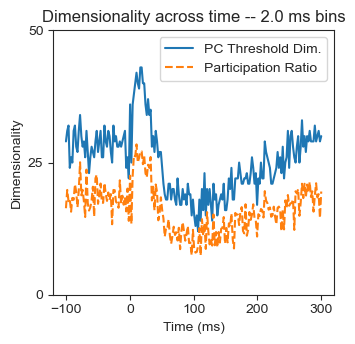

In [95]:
#%% Compute dimensionality over time
d_eff_list, d_pr_list = dimensionality_over_time(data, var_threshold=0.95)

#%% Plot results
fig = plt.figure(figsize=(3.54, 3.54))
plt.plot(time*1000, d_eff_list, label='PC Threshold Dim.')
plt.plot(time*1000, d_pr_list, label='Participation Ratio', linestyle='--')
plt.xlabel('Time (ms)')
plt.ylabel('Dimensionality')
plt.title(f'Dimensionality across time -- {bin_size * 1000} ms bins')
plt.yticks([0, 25, 50])
plt.legend()
plt.tight_layout()

In [96]:
# create a 3D array of trials x neurons x time bins
bin_size = 2/1000 # 2 ms bins
pre = 100/1000 # 100 ms pre-stimulus
post = 300/1000 # 300 ms post-stimulus

data_dict = {}

amps = [-5, -25, -50, -100]
polarities = ['monopolar', 'bipolar']
for r in recordings:
    stim_times = choose_stim_parameter(r.trials, amp = -25, polarity = 'monopolar') # stim times for -50 uA monopolar
    if len(stim_times) > 0:
        stim_times = stim_times[0:75]
        good_units = r.units[r.units['group'] == 'good']
        good_units = good_units[good_units['brain_reg'].str.contains('layer', case=False, na=False)].reset_index() 
        
        n_trials   = len(stim_times)  # Number of trials
        n_neurons  = len(good_units)  # Many neurons as you mentioned
        n_time_bins = int((pre + post) / bin_size) 

        time = np.linspace(-pre, post, n_time_bins)
        data = np.zeros((n_trials, n_neurons, n_time_bins))    # create a 3D array of trials x neurons x time bins
        
        for trial_idx, stim_time in enumerate(stim_times):
            # Define the window [stim_time - pre, stim_time + post] in absolute time
            window_start = stim_time - pre
            window_end = stim_time + post
            # Generate bin edges using linspace to ensure exactly n_time_bins bins:
            bin_edges = np.linspace(window_start, window_end, n_time_bins + 1)
            
            # Loop over each neuron
            for unit_idx, unit in good_units.iterrows():
                spikes = unit['spike_times']  # spike times (in seconds)
                # Bin the spikes using the computed bin edges
                spike_counts, _ = np.histogram(spikes, bins=bin_edges)
                # Convert spike counts into firing rates (spikes per second)
                firing_rate = spike_counts / bin_size
                data[trial_idx, unit_idx, :] = firing_rate

        data_dict[r.mouse] = data

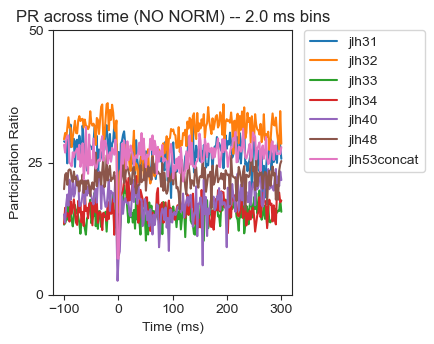

In [97]:
fig = plt.figure(figsize=(4.5, 3.54)) 
for rec, data in data_dict.items():
    d_eff_list, d_pr_list = dimensionality_over_time(data, var_threshold=0.95)
    plt.plot(time*1000, d_pr_list, label=rec)

plt.xlabel('Time (ms)')
plt.ylabel('Participation Ratio')
plt.title(f'PR across time (NO NORM) -- {bin_size * 1000} ms bins')
plt.yticks([0, 25, 50])

# Put legend outside to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()


([<matplotlib.axis.YTick at 0x27247318690>,
 [Text(0, 0, '0'), Text(0, 25, '25'), Text(0, 50, '50')])

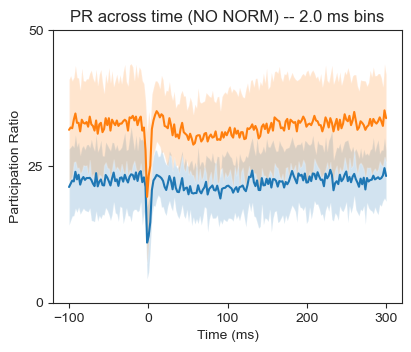

In [98]:
d_eff_dict = {}
d_pr_dict = {}

for rec, data in data_dict.items():
    d_eff_list, d_pr_list = dimensionality_over_time(data, var_threshold=0.95)
    d_eff_dict[rec] = d_eff_list
    d_pr_dict[rec] = d_pr_list

mean_pr = np.mean(list(d_pr_dict.values()), axis=0)
std_pr = np.std(list(d_pr_dict.values()), axis=0)

mean_d_eff = np.mean(list(d_eff_dict.values()), axis=0)
std_d_eff = np.std(list(d_eff_dict.values()), axis=0)

fig = plt.figure(figsize=(4.5, 3.54))
plt.plot(time*1000, mean_pr, label='Mean PR')
plt.fill_between(time*1000, mean_pr - std_pr, mean_pr + std_pr, alpha=0.2, label='Std PR')

plt.plot(time*1000, mean_d_eff, label='Mean Dimensionality')
plt.fill_between(time*1000, mean_d_eff - std_d_eff, mean_d_eff + std_d_eff, alpha=0.2, label='Std Dimensionality')

plt.xlabel('Time (ms)')
plt.ylabel('Participation Ratio')
plt.title(f'PR across time (NO NORM) -- {bin_size * 1000} ms bins')
plt.yticks([0, 25, 50])


In [99]:
from collections import defaultdict

bin_size = 2 / 1000
pre = 200 / 1000
post = 500 / 1000
n_time_bins = int((pre + post) / bin_size)
time = np.linspace(-pre, post, n_time_bins)

data_dict = defaultdict(lambda: defaultdict(dict))
polarities = ['bipolar', 'monopolar']
amps = [-5, -25, -50, -100]

for r in recordings:
    for amp in amps:
        for polarity in polarities:
            stim_times = choose_stim_parameter(r.trials, amp=amp, polarity=polarity)
            if len(stim_times) == 0:
                continue

            stim_times = stim_times[:75]
            good_units = r.units[r.units['group'] == 'good']
            good_units = good_units[good_units['brain_reg'].str.contains('layer', case=False, na=False)].reset_index()

            n_trials = len(stim_times)
            n_neurons = len(good_units)

            data = np.zeros((n_trials, n_neurons, n_time_bins))

            for trial_idx, stim_time in enumerate(stim_times):
                window_start = stim_time - pre
                window_end = stim_time + post
                bin_edges = np.linspace(window_start, window_end, n_time_bins + 1)

                for unit_idx, unit in good_units.iterrows():
                    spikes = unit['spike_times']
                    spike_counts, _ = np.histogram(spikes, bins=bin_edges)
                    firing_rate = spike_counts / bin_size
                    data[trial_idx, unit_idx, :] = firing_rate

            # Compute PCA metrics
            d_eff_list, d_pr_list = dimensionality_over_time(data, var_threshold=0.95)

            data_dict[amp][polarity][r.mouse] = {
                'data': data,
                'time': time,
                'units': good_units,
                'd_eff': d_eff_list,
                'pr': d_pr_list
            }


These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [16 10]
Returning the first one: 16
These are the multiple unique cathodal [ 5 15  2]
Returning the first one: 5
These are the multiple unique cathodal [ 5 15  2]
Returning the first one: 5
These are the multiple unique cathodal [ 5 15  2]
Returning the first one: 5


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_

These are the multiple unique cathodal [15 11]
Returning the first one: 15
These are the multiple unique cathodal [15 11]
Returning the first one: 15
These are the multiple unique cathodal [15 11]
Returning the first one: 15
These are the multiple unique cathodal [15 11]
Returning the first one: 15
These are the multiple unique cathodal [16  7  4]
Returning the first one: 16
These are the multiple unique cathodal [16  4]
Returning the first one: 16
These are the multiple unique cathodal [16  4]
Returning the first one: 16
These are the multiple unique cathodal [16  4]
Returning the first one: 16


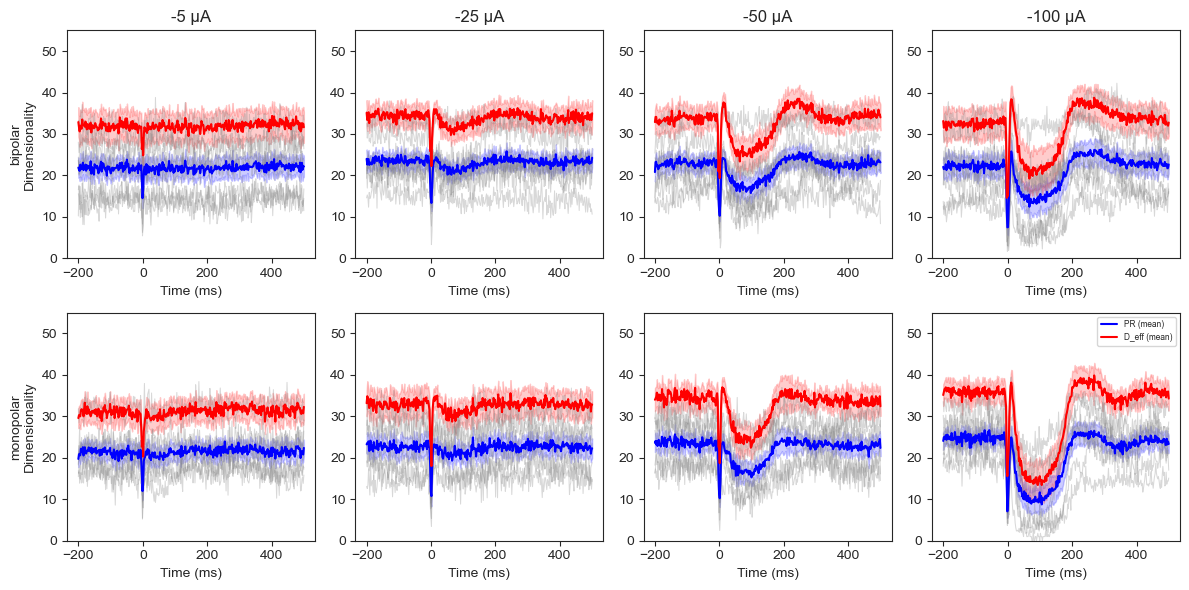

In [100]:
from matplotlib.gridspec import GridSpec

def plot_mean_sem_overlay(data_dict, time):
    fig = plt.figure(figsize=(12, 6))
    gs = GridSpec(2, 4, figure=fig)

    for row, polarity in enumerate(polarities):
        for col, amp in enumerate(amps):
            ax = fig.add_subplot(gs[row, col])
            all_pr = []
            all_deff = []

            for mouse, d in data_dict[amp][polarity].items():
                ax.plot(time * 1000, d['pr'], color='gray', alpha=0.3, linewidth=0.75)
                all_pr.append(d['pr'])
                all_deff.append(d['d_eff'])

            pr_mean = np.mean(all_pr, axis=0)
            pr_sem = np.std(all_pr, axis=0) / np.sqrt(len(all_pr))

            deff_mean = np.mean(all_deff, axis=0)
            deff_sem = np.std(all_deff, axis=0) / np.sqrt(len(all_deff))

            ax.plot(time * 1000, pr_mean, label='PR (mean)', color='blue')
            ax.fill_between(time * 1000, pr_mean - pr_sem, pr_mean + pr_sem, color='blue', alpha=0.2)

            ax.plot(time * 1000, deff_mean, label='D_eff (mean)', color='red')
            ax.fill_between(time * 1000, deff_mean - deff_sem, deff_mean + deff_sem, color='red', alpha=0.2)

            if row == 0:
                ax.set_title(f"{amp} µA")

            if col == 0:
                ax.set_ylabel(f"{polarity}\nDimensionality")

            ax.set_xlabel('Time (ms)')
            ax.set_ylim(0, 55)
            if row == 1 and col == 3:
                ax.legend(loc='upper right', fontsize=6)

    fig.tight_layout()
    return fig

fig_overlay = plot_mean_sem_overlay(data_dict, time)

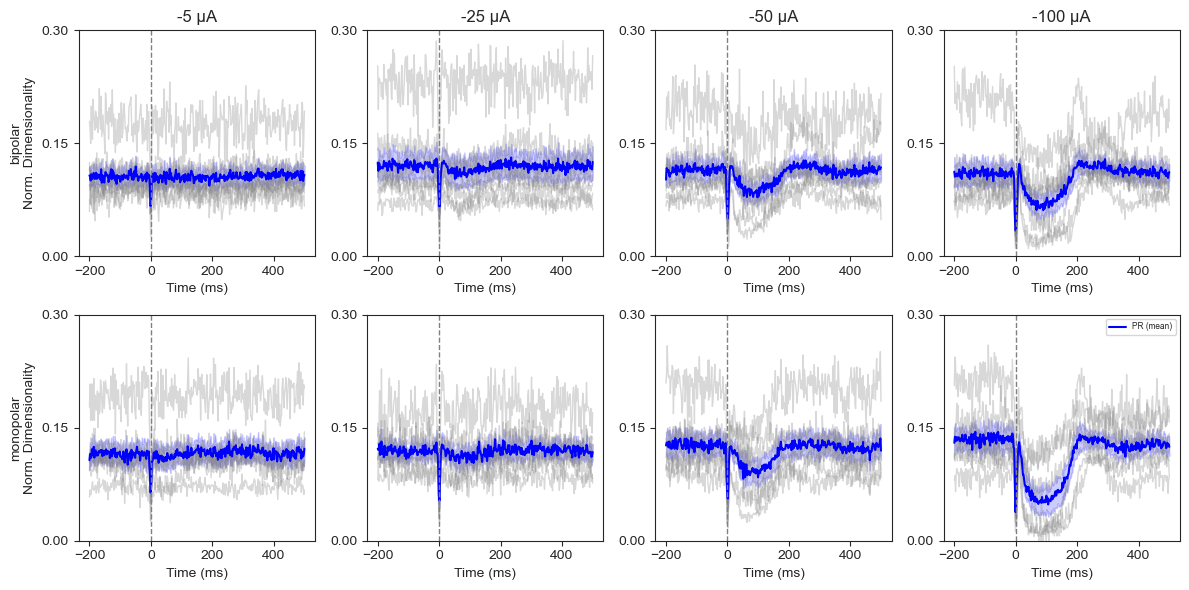

In [101]:
# PR with invidual recs 
def plot_mean_sem_overlay_normalized(data_dict, time):
    fig = plt.figure(figsize=(12, 6))
    gs = GridSpec(2, 4, figure=fig)

    for row, polarity in enumerate(polarities):
        for col, amp in enumerate(amps):
            ax = fig.add_subplot(gs[row, col])
            all_pr = []
            all_deff = []

            for mouse, d in data_dict[amp][polarity].items():
                n_neurons = d['data'].shape[1]
                pr_norm = np.array(d['pr']) / n_neurons
                deff_norm = np.array(d['d_eff']) / n_neurons

                ax.plot(time * 1000, pr_norm, color='gray', alpha=0.3, linewidth=1)
                all_pr.append(pr_norm)
                all_deff.append(deff_norm)

            pr_mean = np.mean(all_pr, axis=0)
            pr_sem = np.std(all_pr, axis=0) / np.sqrt(len(all_pr))

            deff_mean = np.mean(all_deff, axis=0)
            deff_sem = np.std(all_deff, axis=0) / np.sqrt(len(all_deff))

            ax.plot(time * 1000, pr_mean, label='PR (mean)', color='blue')
            ax.fill_between(time * 1000, pr_mean - pr_sem, pr_mean + pr_sem, color='blue', alpha=0.2)

            #ax.plot(time * 1000, deff_mean, label='D_eff (mean)', color='red')
            #ax.fill_between(time * 1000, deff_mean - deff_sem, deff_mean + deff_sem, color='red', alpha=0.2)

            if row == 0:
                ax.set_title(f"{amp} µA")

            if col == 0:
                ax.set_ylabel(f"{polarity}\nNorm. Dimensionality")

            ax.set_xlabel('Time (ms)')
            ax.set_ylim(0, 0.3)
            ax.set_yticks([0.0, 0.15, 0.3])
            if row == 1 and col == 3:
                ax.legend(loc='upper right', fontsize=6)
            ax.axvline(0, color='gray', linestyle='--', linewidth=1)

    fig.tight_layout()
    return fig

fig_overlay_norm = plot_mean_sem_overlay_normalized(data_dict, time)

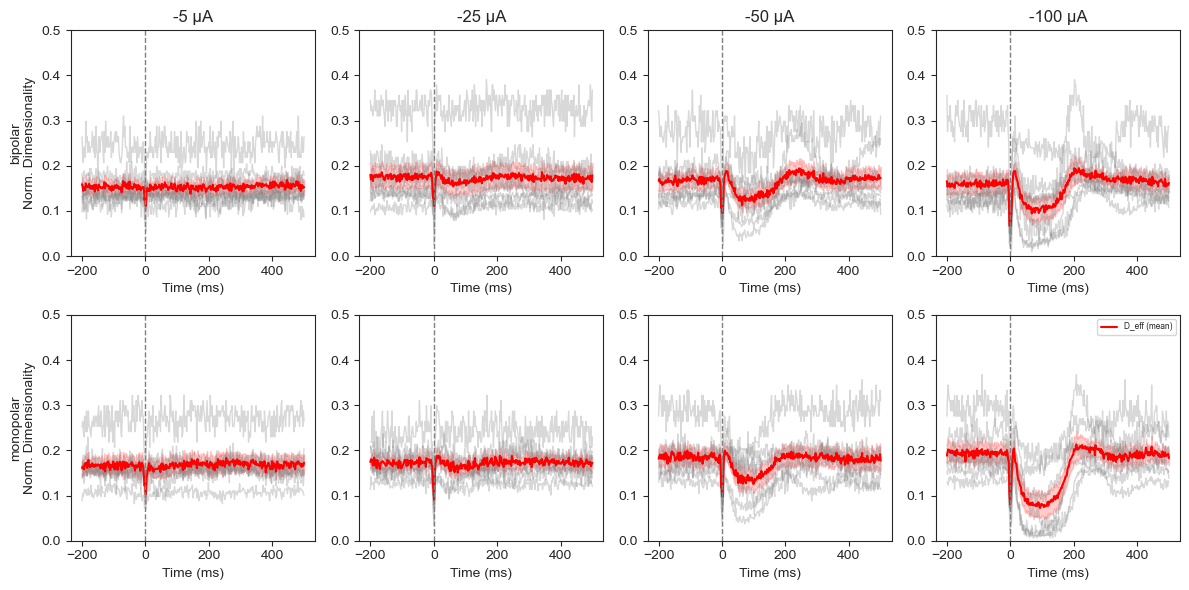

In [102]:
# PR with invidual recs 
def plot_mean_sem_overlay_normalized(data_dict, time):
    fig = plt.figure(figsize=(12, 6))
    gs = GridSpec(2, 4, figure=fig)

    for row, polarity in enumerate(polarities):
        for col, amp in enumerate(amps):
            ax = fig.add_subplot(gs[row, col])
            all_pr = []
            all_deff = []

            for mouse, d in data_dict[amp][polarity].items():
                n_neurons = d['data'].shape[1]
                pr_norm = np.array(d['pr']) / n_neurons
                deff_norm = np.array(d['d_eff']) / n_neurons

                ax.plot(time * 1000, deff_norm, color='gray', alpha=0.3, linewidth=1)
                all_pr.append(pr_norm)
                all_deff.append(deff_norm)

            pr_mean = np.mean(all_pr, axis=0)
            pr_sem = np.std(all_pr, axis=0) / np.sqrt(len(all_pr))

            deff_mean = np.mean(all_deff, axis=0)
            deff_sem = np.std(all_deff, axis=0) / np.sqrt(len(all_deff))

            #ax.plot(time * 1000, pr_mean, label='PR (mean)', color='blue')
            #ax.fill_between(time * 1000, pr_mean - pr_sem, pr_mean + pr_sem, color='blue', alpha=0.2)

            ax.plot(time * 1000, deff_mean, label='D_eff (mean)', color='red')
            ax.fill_between(time * 1000, deff_mean - deff_sem, deff_mean + deff_sem, color='red', alpha=0.2)

            if row == 0:
                ax.set_title(f"{amp} µA")

            if col == 0:
                ax.set_ylabel(f"{polarity}\nNorm. Dimensionality")

            ax.set_xlabel('Time (ms)')
            ax.set_ylim(0, 0.5)
            #ax.set_yticks([0.0, 0.15, 0.3])
            if row == 1 and col == 3:
                ax.legend(loc='upper right', fontsize=6)
            ax.axvline(0, color='gray', linestyle='--', linewidth=1)

    fig.tight_layout()
    return fig

fig_overlay_norm = plot_mean_sem_overlay_normalized(data_dict, time)

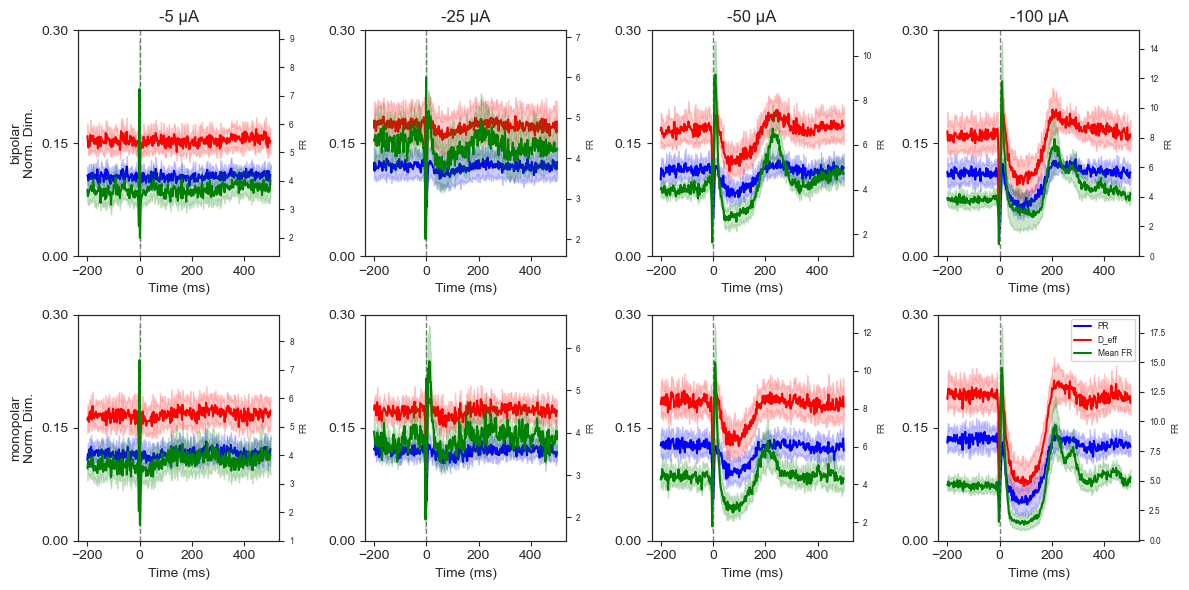

In [105]:
def plot_mean_firing_and_dimensionality_grid(data_dict, time):
    fig = plt.figure(figsize=(12, 6))
    gs = GridSpec(2, 4, figure=fig)

    for row, polarity in enumerate(polarities):
        for col, amp in enumerate(amps):
            ax1 = fig.add_subplot(gs[row, col])
            all_fr = []
            all_pr = []
            all_deff = []

            for mouse, d in data_dict[amp][polarity].items():
                n_neurons = d['data'].shape[1]

                mean_fr = d['data'].mean(axis=(0, 1))
                pr_norm = np.array(d['pr']) / n_neurons
                deff_norm = np.array(d['d_eff']) / n_neurons

                all_fr.append(mean_fr)
                all_pr.append(pr_norm)
                all_deff.append(deff_norm)

            if len(all_fr) == 0:
                continue

            fr_mean = np.mean(all_fr, axis=0)
            fr_sem = np.std(all_fr, axis=0) / np.sqrt(len(all_fr))

            pr_mean = np.mean(all_pr, axis=0)
            pr_sem = np.std(all_pr, axis=0) / np.sqrt(len(all_pr))

            deff_mean = np.mean(all_deff, axis=0)
            deff_sem = np.std(all_deff, axis=0) / np.sqrt(len(all_deff))

            ax1.plot(time * 1000, pr_mean, color='blue', label='PR')
            ax1.fill_between(time * 1000, pr_mean - pr_sem, pr_mean + pr_sem, color='blue', alpha=0.2)

            ax1.plot(time * 1000, deff_mean, color='red', label='D_eff')
            ax1.fill_between(time * 1000, deff_mean - deff_sem, deff_mean + deff_sem, color='red', alpha=0.2)

            ax1.set_ylim(0, 0.3)
            ax1.axvline(0, color='gray', linestyle='--', linewidth=1)
            ax1.set_yticks([0.0, 0.15, 0.3])

            if col == 0:
                ax1.set_ylabel(f"{polarity}\nNorm. Dim.")
            ax1.set_xlabel("Time (ms)")

            ax2 = ax1.twinx()
            ax2.plot(time * 1000, fr_mean, color='green', label='Mean FR')
            ax2.fill_between(time * 1000, fr_mean - fr_sem, fr_mean + fr_sem, color='green', alpha=0.2)
            ax2.set_ylabel("FR", fontsize=6)
            ax2.tick_params(axis='y', labelsize=6)

            if row == 1 and col == 3:
                lines1, labels1 = ax1.get_legend_handles_labels()
                lines2, labels2 = ax2.get_legend_handles_labels()
                ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=6)

            if row == 0:
                ax1.set_title(f"{amp} µA")

    fig.tight_layout()
    return fig

fig_firing_grid = plot_mean_firing_and_dimensionality_grid(data_dict, time)


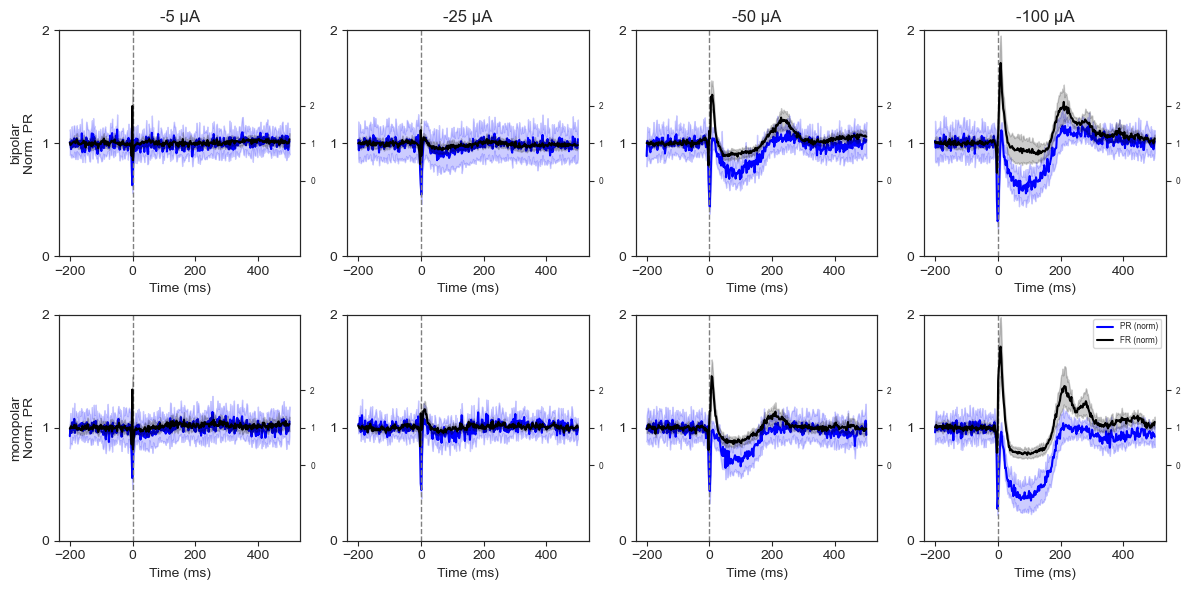

In [106]:
def plot_normalized_pr_and_firing(data_dict, time):
    fig = plt.figure(figsize=(12, 6))
    gs = GridSpec(2, 4, figure=fig)

    for row, polarity in enumerate(polarities):
        for col, amp in enumerate(amps):
            ax1 = fig.add_subplot(gs[row, col])
            all_fr = []
            all_pr = []

            for mouse, d in data_dict[amp][polarity].items():
                n_neurons = d['data'].shape[1]

                mean_fr = d['data'].mean(axis=(0, 1))
                pr_norm = np.array(d['pr']) / n_neurons

                all_fr.append(mean_fr)
                all_pr.append(pr_norm)

            if len(all_fr) == 0:
                continue

            fr_mean = np.mean(all_fr, axis=0)
            fr_sem = np.std(all_fr, axis=0) / np.sqrt(len(all_fr))

            pr_mean = np.mean(all_pr, axis=0)
            pr_sem = np.std(all_pr, axis=0) / np.sqrt(len(all_pr))

            # Normalize to baseline (mean of pre-stimulus period)
            baseline_mask = time < 0
            pr_baseline = np.median(pr_mean[baseline_mask])#.mean()
            fr_baseline = np.median(fr_mean[baseline_mask])#.mean()

            pr_mean_norm = pr_mean / pr_baseline
            fr_mean_norm = fr_mean / fr_baseline
            pr_sem_norm = pr_sem / pr_baseline
            fr_sem_norm = fr_sem / fr_baseline

            # Plot PR (left axis)
            ax1.plot(time * 1000, pr_mean_norm, color='blue', label='PR (norm)')
            ax1.fill_between(time * 1000,
                             pr_mean_norm - pr_sem_norm,
                             pr_mean_norm + pr_sem_norm,
                             color='blue', alpha=0.2)
            ax1.set_ylim(0, 2)
            ax1.set_yticks([0, 1, 2])
            ax1.axvline(0, color='gray', linestyle='--', linewidth=1)

            if col == 0:
                ax1.set_ylabel(f"{polarity}\nNorm. PR")

            ax1.set_xlabel("Time (ms)")

            # Plot FR (right axis)
            ax2 = ax1.twinx()
            ax2.plot(time * 1000, fr_mean_norm, color='black', label='FR (norm)')
            ax2.fill_between(time * 1000,
                             fr_mean_norm - fr_sem_norm,
                             fr_mean_norm + fr_sem_norm,
                             color='black', alpha=0.2)
            ax2.set_ylim(-2, 4)
            ax2.set_yticks([0, 1, 2])
            ax2.tick_params(axis='y', labelsize=6)

            if row == 0:
                ax1.set_title(f"{amp} µA")

            if row == 1 and col == 3:
                lines1, labels1 = ax1.get_legend_handles_labels()
                lines2, labels2 = ax2.get_legend_handles_labels()
                ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=6)

    fig.tight_layout()
    return fig

fig_norm_pr_fr = plot_normalized_pr_and_firing(data_dict, time)


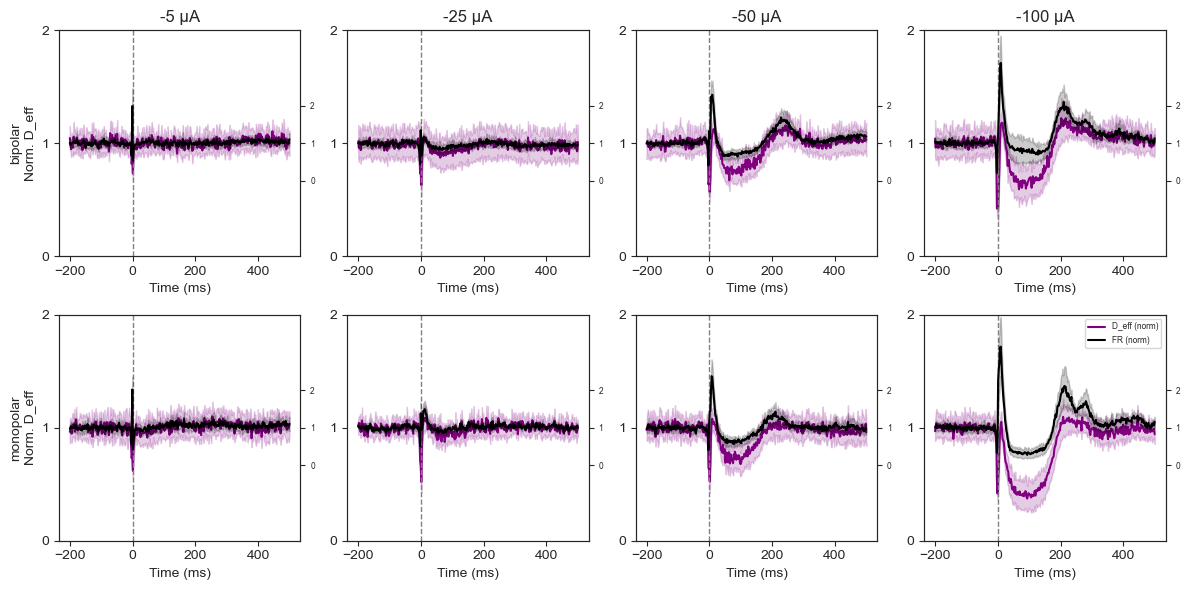

In [110]:
def plot_normalized_deff_and_firing(data_dict, time):
    fig = plt.figure(figsize=(12, 6))
    gs = GridSpec(2, 4, figure=fig)

    for row, polarity in enumerate(polarities):
        for col, amp in enumerate(amps):
            ax1 = fig.add_subplot(gs[row, col])
            all_fr = []
            all_deff = []

            for mouse, d in data_dict[amp][polarity].items():
                n_neurons = d['data'].shape[1]

                mean_fr = d['data'].mean(axis=(0, 1))
                deff_norm = np.array(d['d_eff']) / n_neurons

                all_fr.append(mean_fr)
                all_deff.append(deff_norm)

            if len(all_fr) == 0:
                continue

            fr_mean = np.mean(all_fr, axis=0)
            fr_sem = np.std(all_fr, axis=0) / np.sqrt(len(all_fr))

            deff_mean = np.mean(all_deff, axis=0)
            deff_sem = np.std(all_deff, axis=0) / np.sqrt(len(all_deff))

            # Normalize to baseline (mean of pre-stimulus period)
            baseline_mask = time < 0
            deff_baseline = np.median(deff_mean[baseline_mask])#.mean()
            fr_baseline = np.median(fr_mean[baseline_mask])#.mean()

            deff_mean_norm = deff_mean / deff_baseline
            fr_mean_norm = fr_mean / fr_baseline
            deff_sem_norm = deff_sem / deff_baseline
            fr_sem_norm = fr_sem / fr_baseline

            # Plot D_eff (left axis)
            ax1.plot(time * 1000, deff_mean_norm, color='purple', label='D_eff (norm)')
            ax1.fill_between(time * 1000,
                             deff_mean_norm - deff_sem_norm,
                             deff_mean_norm + deff_sem_norm,
                             color='purple', alpha=0.2)
            ax1.set_ylim(0, 2)
            #ax1.set_xlim(-10, 20)
            ax1.set_yticks([0, 1, 2])
            ax1.axvline(0, color='gray', linestyle='--', linewidth=1)

            if col == 0:
                ax1.set_ylabel(f"{polarity}\nNorm. D_eff")

            ax1.set_xlabel("Time (ms)")

            # Plot FR (right axis)
            ax2 = ax1.twinx()
            ax2.plot(time * 1000, fr_mean_norm, color='black', label='FR (norm)')
            ax2.fill_between(time * 1000,
                             fr_mean_norm - fr_sem_norm,
                             fr_mean_norm + fr_sem_norm,
                             color='black', alpha=0.2)
            ax2.set_ylim(-2, 4)
            ax2.set_yticks([0, 1, 2])
            ax2.tick_params(axis='y', labelsize=6)

            if row == 0:
                ax1.set_title(f"{amp} µA")

            if row == 1 and col == 3:
                lines1, labels1 = ax1.get_legend_handles_labels()
                lines2, labels2 = ax2.get_legend_handles_labels()
                ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=6)
                
    fig.tight_layout()
    return fig

fig_norm_deff_fr = plot_normalized_deff_and_firing(data_dict, time)


In [111]:
from pynwb import NWBHDF5IO, NWBFile
base = r'C:\Users\jordan\Desktop\nwbs_vstim'

trials_dict = {} 
units_dict = {}

for i, p in enumerate(os.listdir(base)):
    path = os.path.join(base, p)
    print(i)
    try:
        io = NWBHDF5IO(path, 'r')
        nwbfile = io.read() 
        trials = nwbfile.trials.to_dataframe()
        units = nwbfile.units.to_dataframe()
        trials_dict[i] = trials
        units_dict[i] = units
        io.close()
    except Exception as e:
        print(f"Error reading {p}: {e}")
        continue
        

0


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Error reading 20210923_3589_ABC_g0.nwb: Fancy indexing out of range for (0-0)
1


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Error reading 20211115_7211_ABC_g0.nwb: Fancy indexing out of range for (0-0)
2


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


3


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


4


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


5


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


6
Error reading New folder: [Errno 13] Unable to synchronously open file (unable to open file: name = 'C:\Users\jordan\Desktop\nwbs_vstim\New folder', errno = 13, error message = 'Permission denied', flags = 0, o_flags = 0)


In [112]:
bin_size = 2 / 1000
pre = 200 / 1000
post = 500 / 1000
n_time_bins = int((pre + post) / bin_size)
time = np.linspace(-pre, post, n_time_bins)
from collections import defaultdict
vis_data_dict = defaultdict(lambda: defaultdict(dict))

for k, v in trials_dict.items():
    stim_times = v[v['stimulus'] == 'luminance_flash'].start_time.values 
    #print(len(stim_times))
    units = units_dict[k]
    good_units = units[units['label'] != 2.0]
    n_trials = len(stim_times)
    n_neurons = len(good_units)
    data = np.zeros((n_trials, n_neurons, n_time_bins))
    
    for trial_idx, stim_time in enumerate(stim_times):
        window_start = stim_time - pre
        window_end = stim_time + post
        bin_edges = np.linspace(window_start, window_end, n_time_bins + 1)

        for unit_idx, unit in good_units.iterrows():
            spikes = unit['spike_times']
            spike_counts, _ = np.histogram(spikes, bins=bin_edges)
            firing_rate = spike_counts / bin_size
            data[trial_idx, unit_idx, :] = firing_rate
            
    d_eff_list, d_pr_list = dimensionality_over_time(data, var_threshold=0.95)
    vis_data_dict[k] = {
                            'data': data,
                            'time': time,
                            'units': good_units,
                            'd_eff': d_eff_list,
                            'pr': d_pr_list
                        } 
    

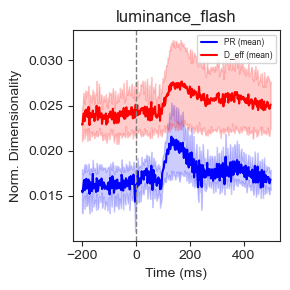

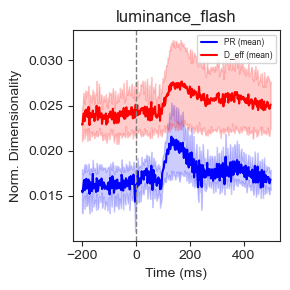

In [113]:
def plot_mean_sem_overlay_normalized_vis(vis_data_dict, time):
    fig, ax = plt.subplots(figsize=(3, 3))

    all_pr = []
    all_deff = []

    for k, d in vis_data_dict.items():
        n_neurons = d['data'].shape[1]
        pr_norm = np.array(d['pr']) / n_neurons
        deff_norm = np.array(d['d_eff']) / n_neurons

        #ax.plot(time * 1000, pr_norm, color='gray', alpha=0.3, linewidth=0.75)
        all_pr.append(pr_norm)
        all_deff.append(deff_norm)

    pr_mean = np.mean(all_pr, axis=0)
    pr_sem = np.std(all_pr, axis=0) / np.sqrt(len(all_pr))

    deff_mean = np.mean(all_deff, axis=0)
    deff_sem = np.std(all_deff, axis=0) / np.sqrt(len(all_deff))

    ax.plot(time * 1000, pr_mean, label='PR (mean)', color='blue')
    ax.fill_between(time * 1000, pr_mean - pr_sem, pr_mean + pr_sem, color='blue', alpha=0.2)

    ax.plot(time * 1000, deff_mean, label='D_eff (mean)', color='red')
    ax.fill_between(time * 1000, deff_mean - deff_sem, deff_mean + deff_sem, color='red', alpha=0.2)

    ax.set_title(f"luminance_flash")

    ax.set_ylabel(f"Norm. Dimensionality")

    ax.set_xlabel('Time (ms)')
    
    #ax.set_ylim(0, 0.3)
    #ax.set_yticks([0.0, 0.15, 0.3])
    ax.legend(loc='upper right', fontsize=6)
    ax.axvline(0, color='gray', linestyle='--', linewidth=1)

    fig.tight_layout()
    return fig

plot_mean_sem_overlay_normalized_vis(vis_data_dict, time)

In [114]:
d4_units = pd.read_json(r"C:\Users\jordan\Desktop\nwbs_vstim\New folder\d4_units.json")
d4_trials = pd.read_json(r"C:\Users\jordan\Desktop\nwbs_vstim\New folder\d4_stim_updated.json")

d5_units = pd.read_json(r"C:\Users\jordan\Desktop\nwbs_vstim\New folder\d5_units.json")
d5_trials = pd.read_json(r"C:\Users\jordan\Desktop\nwbs_vstim\New folder\d5_stim_updated.json")

d6_units = pd.read_json(r"C:\Users\jordan\Desktop\nwbs_vstim\New folder\d6_units.json")
d6_trials = pd.read_json(r"C:\Users\jordan\Desktop\nwbs_vstim\New folder\d6_stim_updated.json")

In [115]:
vis_units_list = [d4_units, d5_units, d6_units]
vis_trials_list = [d4_trials, d5_trials, d6_trials]

bin_size = 2 / 1000
pre = 200 / 1000
post = 500 / 1000
n_time_bins = int((pre + post) / bin_size)
time = np.linspace(-pre, post, n_time_bins)

vis_data_dict = {}

for i, (units, trials) in enumerate(zip(vis_units_list, vis_trials_list)):
    stim_times = trials[trials['stimulus'] == 'luminance_flash'].start_time.values 
    good_units = units 
    #good_units = units[units['qmLabel'] == 'GOOD'].reset_index()  # Exclude bad units
    #good_units = good_units[good_units['region'].str.contains('visual', case = False, na = False)].reset_index()
    n_trials = len(stim_times)
    n_neurons = len(good_units)
    data = np.zeros((n_trials, n_neurons, n_time_bins))

    for trial_idx, stim_time in enumerate(stim_times):
        window_start = stim_time - pre
        window_end = stim_time + post
        bin_edges = np.linspace(window_start, window_end, n_time_bins + 1)

        for unit_idx, unit in good_units.iterrows():
            spikes = unit['times']
            spike_counts, _ = np.histogram(spikes, bins=bin_edges)
            firing_rate = spike_counts / bin_size
            data[trial_idx, unit_idx, :] = firing_rate
            
    d_eff_list, d_pr_list = dimensionality_over_time(data, var_threshold=0.95)
    vis_data_dict[i] = {
                            'data': data,
                            'time': time,
                            'units': good_units,
                            'd_eff': d_eff_list,
                            'pr': d_pr_list
                        }